In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import uniform

# **AMSTERDAM**

In [3]:
amsterdam_data = pd.read_csv('DATASETS/amsterdam_data.csv.gz')

In [4]:
amsterdam_data.head()

id                          listing_url       scrape_id last_scraped  \
0  290701  https://www.airbnb.com/rooms/290701  20241207054011   2024-12-07   
1  291752  https://www.airbnb.com/rooms/291752  20241207054011   2024-12-07   
2  304082  https://www.airbnb.com/rooms/304082  20241207054011   2024-12-07   
3  304143  https://www.airbnb.com/rooms/304143  20241207054011   2024-12-07   
4  306852  https://www.airbnb.com/rooms/306852  20241207054011   2024-12-07   

            source                                               name  \
0      city scrape  Central, big window, rear room with private bath.   
1      city scrape                   Cozy & large bohemian style room   
2      city scrape   Private, quiet studio in the centre with terrace   
3  previous scrape                  Unique Beautiful Houseboat (ship)   
4  previous scrape         SunShine, A Sunny Amsterdam Center Special   

                                         description  \
0  ((I have a minimum 3 night stay policy. 1 or 2...   
1  Cozy spacious room in a beautiful and spiritua...   
2  We offer a cosy, quiet studio in the very cent...   
3  The best way to experience Amsterdam-City. Liv...   
4                                                NaN   

                               neighborhood_overview  \
0  The home is in the heart of the city but is su...   
1  It is a calm yet atmospheric residential area ...   
2                                                NaN   
3  The Plantage neighborhood is part of the city ...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/airflow/Hosti...  1491565  ...   
1  https://a0.muscache.com/pictures/250e82ad-b80b...  1511330  ...   
2  https://a0.muscache.com/pictures/a85c2467-eec4...   276068  ...   
3  https://a0.muscache.com/pictures/3201940/ec9c5...  1565319  ...   
4  https://a0.muscache.com/pictures/3240023/0081b...  1141485  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.90                   4.92                4.75   
1                        4.93                   4.79                4.73   
2                        4.84                   4.88                4.58   
3                        4.86                   4.85                4.44   
4                        4.88                   4.91                4.66   

                    license instant_bookable calculated_host_listings_count  \
0  0363 DF01 FBC0 496B 9730                t                              2   
1  0363 6ACC BA1B 12A9 60C1                f                              1   
2  0363 6C40 7413 ADD3 9AF8                f                              1   
3      0363AF9644094CEBCE6B                f                              1   
4  0363 33C3 B936 3911 FC42                f                              3   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           1   
3                                           1   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            1   
2                                            0   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              3.05  
1                                           0              1.72  
2                                           0              2.15  
3                                           0              0.32  
4                                           0              0.21  

[5 rows x 75 columns]

In [5]:
print(amsterdam_data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Data Optimization

### Null Values

In [6]:
# Calculate missing values and their percentage
missing_values = amsterdam_data.isnull().sum()
missing_percent = (missing_values / len(amsterdam_data)) * 100

# Create a DataFrame and sort it from highest to lowest missing percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Keep only columns with missing values
missing_data = missing_data.sort_values(by='Percentage (%)', ascending=False)

# Display all rows
pd.set_option('display.max_rows', None)
print("Missing Values per Column (sorted by percentage):")
print(missing_data)


Missing Values per Column (sorted by percentage):
                              Missing Values  Percentage (%)
neighbourhood_group_cleansed           10032      100.000000
calendar_updated                       10032      100.000000
host_neighbourhood                      7117       70.942982
host_about                              4719       47.039474
neighbourhood                           4596       45.813397
neighborhood_overview                   4596       45.813397
host_response_time                      3873       38.606459
host_response_rate                      3873       38.606459
beds                                    3767       37.549841
bathrooms                               3743       37.310606
price                                   3742       37.300638
host_acceptance_rate                    2010       20.035885
host_location                           1121       11.174242
review_scores_cleanliness               1091       10.875199
review_scores_location             

In [7]:
# Remove columns with more than 49% missing values, (TO DECIDE WHAT THRESHOLD WE APPLY)
threshold = 49
filtered_columns = missing_percent[missing_percent < threshold].index
df_amsterdam = amsterdam_data[filtered_columns]
print("\nRemaining columns after removing those with more than 49% missing values:")
print(df_amsterdam.columns)


Remaining columns after removing those with more than 49% missing values:
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights

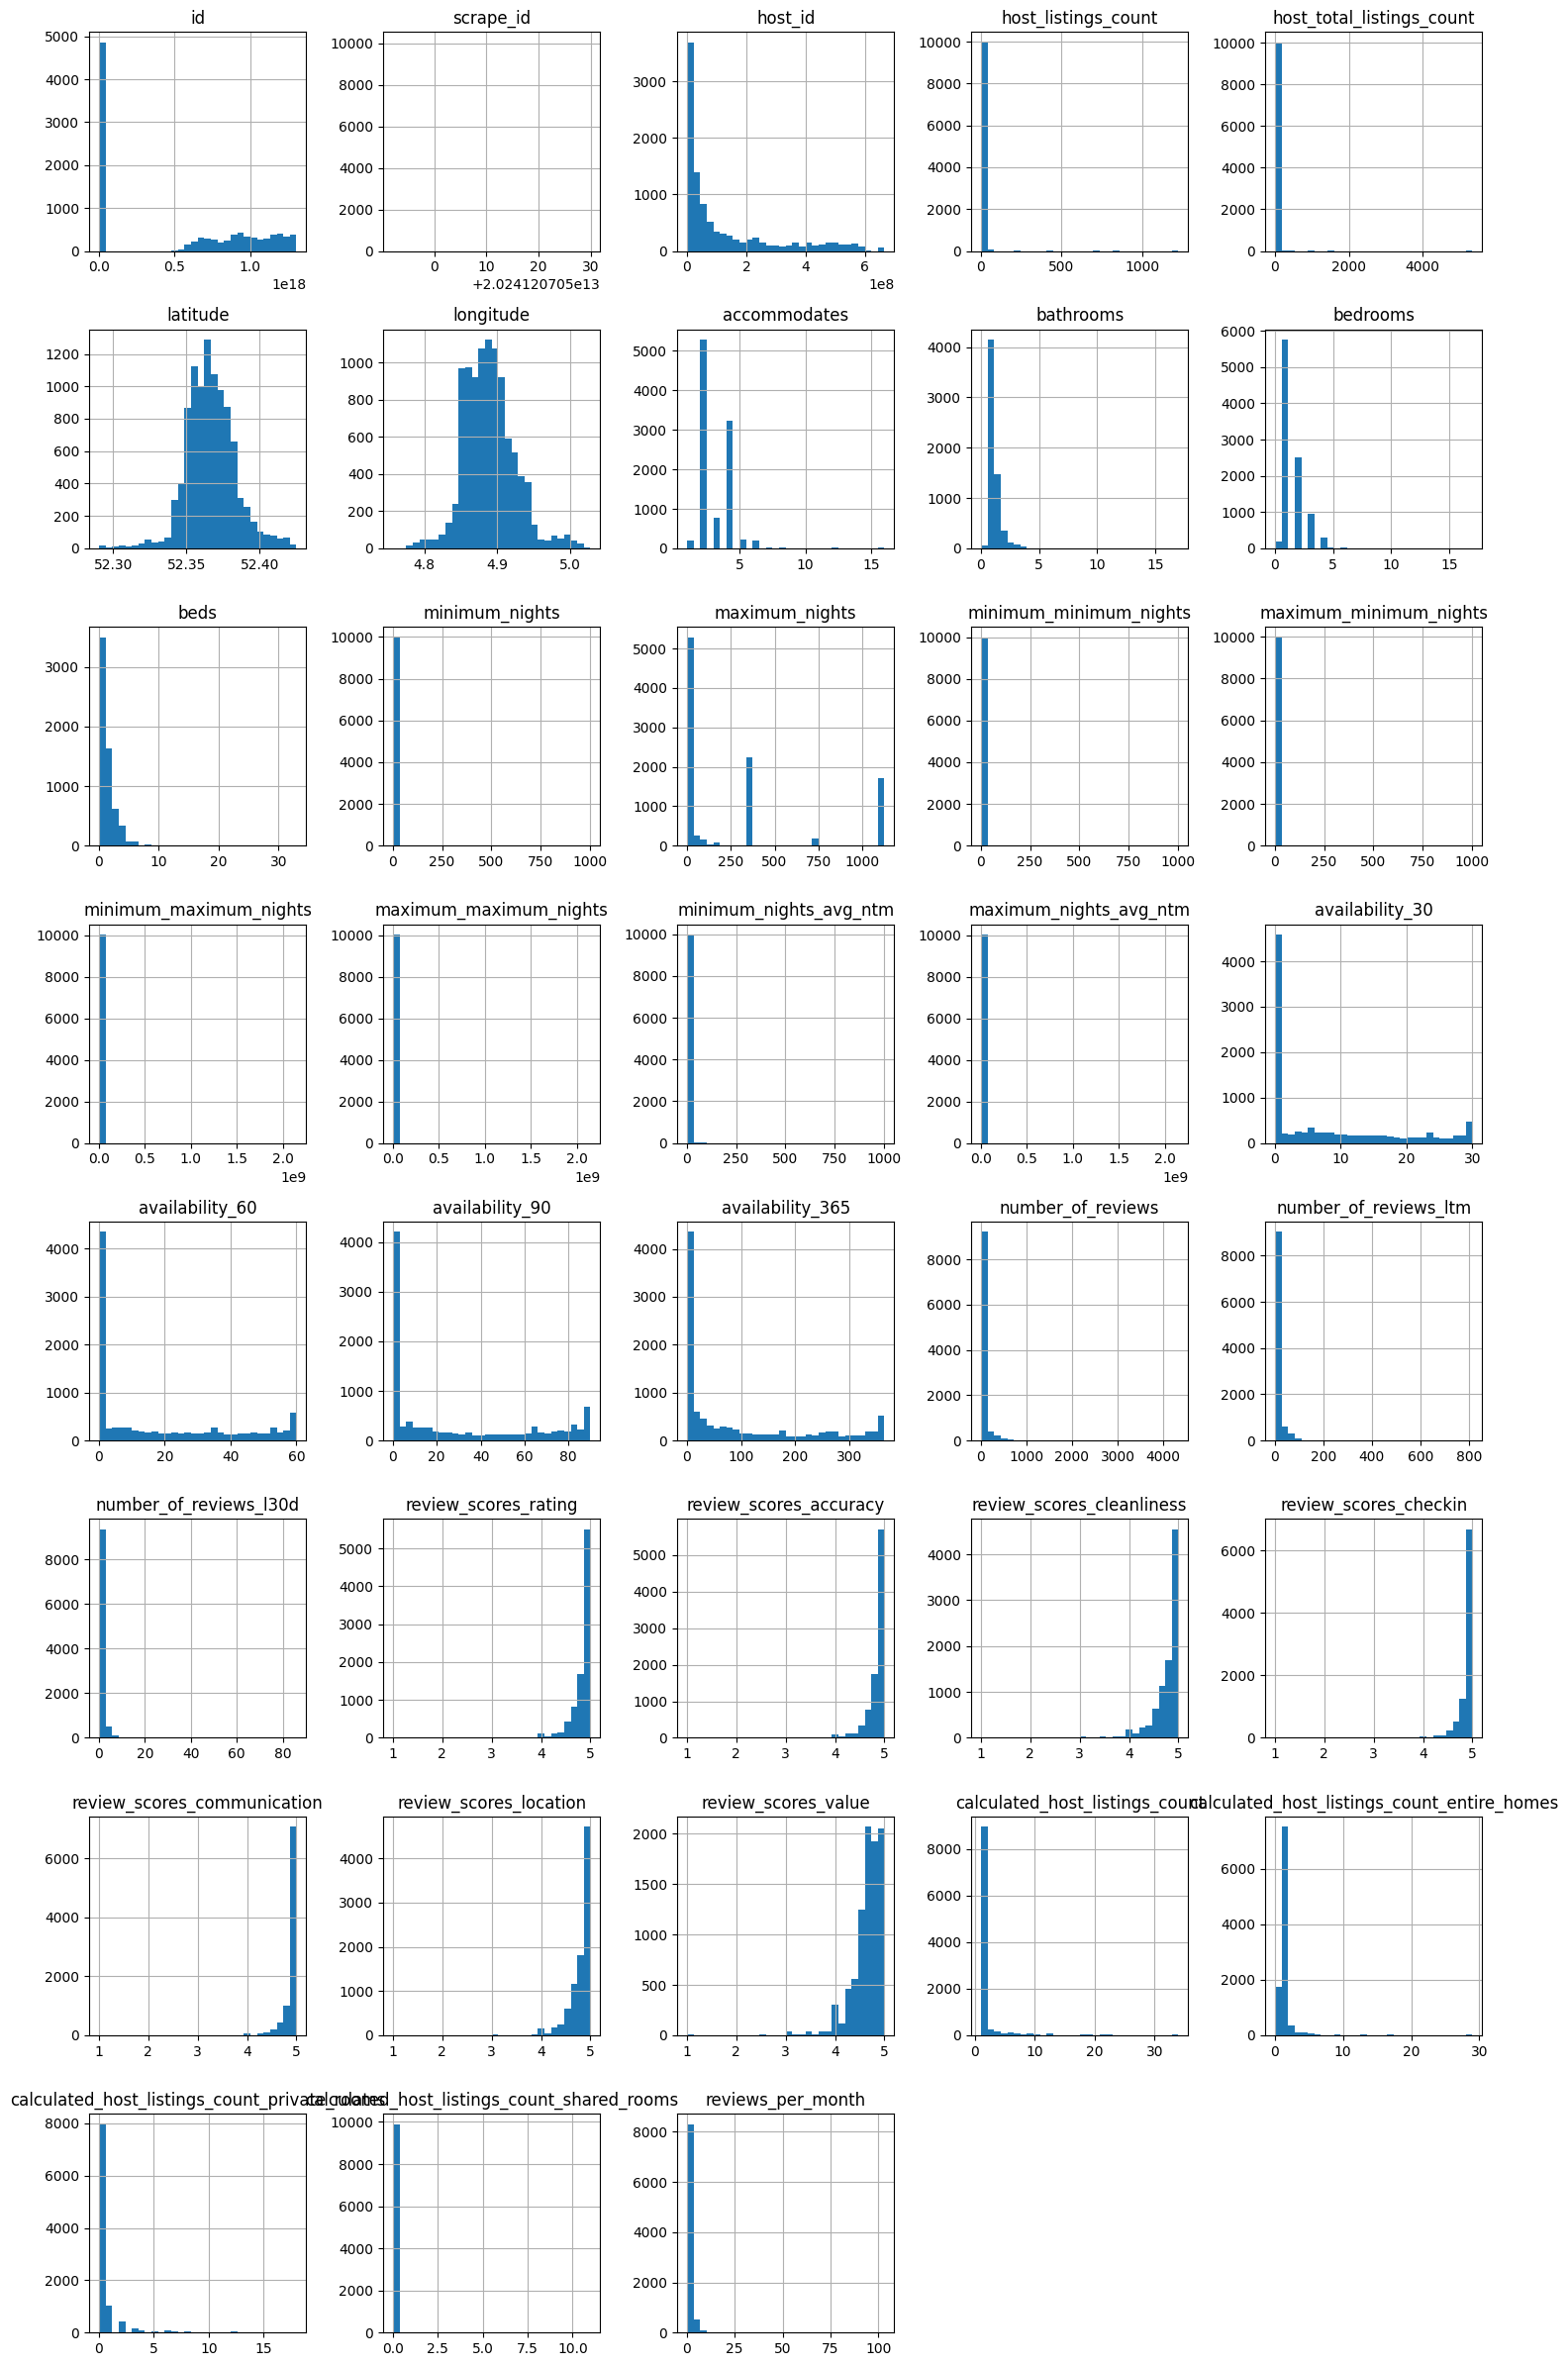

In [8]:
# Select only numeric columns
numeric_cols = df_amsterdam.select_dtypes(include=['number']).columns.tolist()

# Calculate the number of rows and columns needed for the grid
num_cols = len(numeric_cols)
ncols = 5  # Set number of columns per row
nrows = (num_cols // ncols) + (num_cols % ncols > 0)  # Calculate rows needed

# Plot the histograms with the adjusted layout
df_amsterdam[numeric_cols].hist(figsize=(15, nrows*3), bins=30, layout=(nrows, ncols))
plt.tight_layout()
plt.show()



- We have decided to impute numerical variables using the median because of the presence of skewness and outliers. Median imputation is more robust in these cases, as it is not affected by extreme values. This approach ensures that the imputed values better represent the central tendency of the data without being distorted by outliers.

- For most categorical variables, we decided that mode imputation is the best default choice, as it maintains consistency with the dataset. However, if the missing values have a potential meaning, an "Unknown" category was also used.

In [9]:
# Clean 'price' column by removing '$' and ',' and converting to float
df_amsterdam['price'] = df_amsterdam['price'].replace({'\\$':'', ',':''}, regex=True).astype(float)

<ipython-input-9-0f35f8c8017e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['price'] = df_amsterdam['price'].replace({'\\$':'', ',':''}, regex=True).astype(float)


In [10]:
# Group by 'neighbourhood_cleansed' and calculate the median price
neighbourhood_price_median = df_amsterdam.groupby('neighbourhood_cleansed')['price'].median()

# Fill missing 'price' values with the mean of the respective 'neighbourhood_cleansed'
df_amsterdam['price'] = df_amsterdam.apply(
    lambda row: neighbourhood_price_median[row['neighbourhood_cleansed']] if pd.isnull(row['price']) else row['price'],
    axis=1
)

# Check if missing values in 'price' are filled
remaining_missing_values = df_amsterdam['price'].isnull().sum()
print(f"Remaining missing values in 'price': {remaining_missing_values}")

Remaining missing values in 'price': 0


<ipython-input-10-7b94cfa55e8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['price'] = df_amsterdam.apply(


In [11]:
df_amsterdam['beds'] = df_amsterdam.groupby('room_type')['beds'].transform(lambda x: x.fillna(x.median()))
df_amsterdam['bathrooms'] = df_amsterdam.groupby('room_type')['bathrooms'].transform(lambda x: x.fillna(x.median()))
df_amsterdam['bedrooms'] = df_amsterdam.groupby('room_type')['bedrooms'].transform(lambda x: x.fillna(x.median()))

<ipython-input-11-e50a1ecb469d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['beds'] = df_amsterdam.groupby('room_type')['beds'].transform(lambda x: x.fillna(x.median()))
<ipython-input-11-e50a1ecb469d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['bathrooms'] = df_amsterdam.groupby('room_type')['bathrooms'].transform(lambda x: x.fillna(x.median()))
<ipython-input-11-e50a1ecb469d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [12]:
# Impute availability columns with median
df_amsterdam['availability_30'] = df_amsterdam['availability_30'].fillna(df_amsterdam['availability_30'].median())
df_amsterdam['availability_60'] = df_amsterdam['availability_60'].fillna(df_amsterdam['availability_60'].median())
df_amsterdam['availability_90'] = df_amsterdam['availability_90'].fillna(df_amsterdam['availability_90'].median())
df_amsterdam['availability_365'] = df_amsterdam['availability_365'].fillna(df_amsterdam['availability_365'].median())

<ipython-input-12-7471679d4e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['availability_30'] = df_amsterdam['availability_30'].fillna(df_amsterdam['availability_30'].median())
<ipython-input-12-7471679d4e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['availability_60'] = df_amsterdam['availability_60'].fillna(df_amsterdam['availability_60'].median())
<ipython-input-12-7471679d4e20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [13]:
# Impute each review score column
review_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'reviews_per_month'
]

# Impute each review score column with the median (to avoid outliers)
for col in review_columns:
    df_amsterdam[col] = df_amsterdam[col].fillna(df_amsterdam[col].median())

<ipython-input-13-4097c28134a6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam[col] = df_amsterdam[col].fillna(df_amsterdam[col].median())


In [14]:
# Impute missing values with the median
df_amsterdam['minimum_nights_avg_ntm'] = df_amsterdam['minimum_nights_avg_ntm'].fillna(df_amsterdam['minimum_nights_avg_ntm'].median())
df_amsterdam['maximum_nights_avg_ntm'] = df_amsterdam['maximum_nights_avg_ntm'].fillna(df_amsterdam['maximum_nights_avg_ntm'].median())

<ipython-input-14-b092e8509b60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['minimum_nights_avg_ntm'] = df_amsterdam['minimum_nights_avg_ntm'].fillna(df_amsterdam['minimum_nights_avg_ntm'].median())
<ipython-input-14-b092e8509b60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['maximum_nights_avg_ntm'] = df_amsterdam['maximum_nights_avg_ntm'].fillna(df_amsterdam['maximum_nights_avg_ntm'].median())


In [15]:
df_amsterdam['host_acceptance_rate'] = df_amsterdam['host_acceptance_rate'].str.replace('%', '').astype(float)
df_amsterdam['host_response_rate'] = df_amsterdam['host_response_rate'].str.replace('%', '').astype(float)

df_amsterdam['host_acceptance_rate'] = df_amsterdam['host_acceptance_rate'].fillna(df_amsterdam['host_acceptance_rate'].median())
df_amsterdam['host_response_rate'] = df_amsterdam['host_response_rate'].fillna(df_amsterdam['host_response_rate'].median())

<ipython-input-15-e22e11fe52a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['host_acceptance_rate'] = df_amsterdam['host_acceptance_rate'].str.replace('%', '').astype(float)
<ipython-input-15-e22e11fe52a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['host_response_rate'] = df_amsterdam['host_response_rate'].str.replace('%', '').astype(float)
<ipython-input-15-e22e11fe52a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [16]:
# Impute categorical columns with mode (most frequent value)
df_amsterdam['host_response_time'] = df_amsterdam['host_response_time'].fillna(df_amsterdam['host_response_time'].mode()[0])
df_amsterdam['host_location'] = df_amsterdam['host_location'].fillna(df_amsterdam['host_location'].mode()[0])
df_amsterdam['host_is_superhost'] = df_amsterdam['host_is_superhost'].fillna(df_amsterdam['host_is_superhost'].mode()[0])


<ipython-input-16-9d3365b5b676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['host_response_time'] = df_amsterdam['host_response_time'].fillna(df_amsterdam['host_response_time'].mode()[0])
<ipython-input-16-9d3365b5b676>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['host_location'] = df_amsterdam['host_location'].fillna(df_amsterdam['host_location'].mode()[0])
<ipython-input-16-9d3365b5b676>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [17]:
# Fill missing values in 'has_availability' with "Unknown"'
df_amsterdam['has_availability'] = df_amsterdam['has_availability'].fillna('Unknown')

<ipython-input-17-201d319e57df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['has_availability'] = df_amsterdam['has_availability'].fillna('Unknown')


In [18]:
# Impute first and last review with a placeholder
df_amsterdam['first_review'] = df_amsterdam['first_review'].fillna('Unknown')
df_amsterdam['last_review'] = df_amsterdam['last_review'].fillna('Unknown')

<ipython-input-18-f139c869e3a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['first_review'] = df_amsterdam['first_review'].fillna('Unknown')
<ipython-input-18-f139c869e3a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['last_review'] = df_amsterdam['last_review'].fillna('Unknown')


In [19]:
# Impute license with 'Unknown'
df_amsterdam['license'] = df_amsterdam['license'].fillna('Unknown')

<ipython-input-19-ed92a6b68d35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['license'] = df_amsterdam['license'].fillna('Unknown')


In [20]:
# Check for any remaining missing values
remaining_missing = df_amsterdam.isnull().sum()
print(f"Remaining missing values: {remaining_missing}")

Remaining missing values: id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      344
neighborhood_overview                           4596
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                      4719
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost   

### Duplicates

In [21]:
# Check for duplicates in the 'id' column
duplicates_id = df_amsterdam[df_amsterdam.duplicated(subset=['id'])]

# Display the duplicates
print(f"Number of duplicate rows based on 'id': {duplicates_id.shape[0]}")
print(duplicates_id)


Number of duplicate rows based on 'id': 0
Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review

### Outliers

In [22]:
# Select only numerical columns
numerical_cols = df_amsterdam.select_dtypes(include=['number', 'float64', 'int64']).columns

# Function to calculate percentage of outliers using IQR method
def calculate_outlier_percentage(df, cols):
    outlier_counts = {}
    total_rows = len(df)

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = (len(outliers) / total_rows) * 100

        outlier_counts[col] = round(outlier_percentage, 2)  # Round to 2 decimal places

    return outlier_counts

# Get outlier percentages before replacing
print("\nOutlier percentages before replacing:")
outlier_percentages = calculate_outlier_percentage(df_amsterdam, numerical_cols)
for col, perc in outlier_percentages.items():
    print(f"Outliers in {col}: {perc}%")


Outlier percentages before replacing:
Outliers in id: 0.0%
Outliers in scrape_id: 0.0%
Outliers in host_id: 10.05%
Outliers in host_response_rate: 12.34%
Outliers in host_acceptance_rate: 0.0%
Outliers in host_listings_count: 23.28%
Outliers in host_total_listings_count: 15.69%
Outliers in latitude: 3.74%
Outliers in longitude: 3.38%
Outliers in accommodates: 0.78%
Outliers in bathrooms: 21.36%
Outliers in bedrooms: 3.6%
Outliers in beds: 5.22%
Outliers in price: 15.14%
Outliers in minimum_nights: 4.07%
Outliers in maximum_nights: 17.36%
Outliers in minimum_minimum_nights: 13.87%
Outliers in maximum_minimum_nights: 5.54%
Outliers in minimum_maximum_nights: 0.02%
Outliers in maximum_maximum_nights: 0.02%
Outliers in minimum_nights_avg_ntm: 4.63%
Outliers in maximum_nights_avg_ntm: 0.02%
Outliers in availability_30: 0.0%
Outliers in availability_60: 0.0%
Outliers in availability_90: 0.0%
Outliers in availability_365: 0.0%
Outliers in number_of_reviews: 13.83%
Outliers in number_of_revie

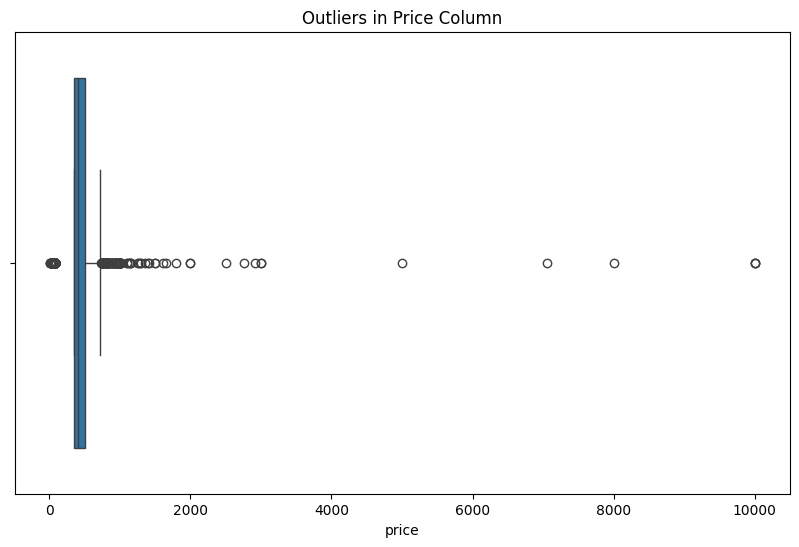

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular IQR
Q1 = df_amsterdam['price'].quantile(0.25)
Q3 = df_amsterdam['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar solo los outliers
outliers = df_amsterdam[(df_amsterdam['price'] < lower_bound) | (df_amsterdam['price'] > upper_bound)]

# Gráfico de los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=outliers['price'])
plt.title('Outliers in Price Column')
plt.show()


In [24]:
# Calculate the 25th and 75th percentiles of the price column to define the IQR
Q1 = df_amsterdam['price'].quantile(0.25)
Q3 = df_amsterdam['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where price is an outlier
outliers = df_amsterdam[(df_amsterdam['price'] < lower_bound) | (df_amsterdam['price'] > upper_bound)]

# Calculate the median price for each neighborhood
neighbourhood_median_price = df_amsterdam.groupby('neighbourhood_cleansed')['price'].median()

# Function to impute outliers with the median price of the respective neighborhood
def impute_outliers(row):
    if row['price'] < lower_bound or row['price'] > upper_bound:
        return neighbourhood_median_price[row['neighbourhood_cleansed']]
    return row['price']

# Apply the function to impute outliers
df_amsterdam['price'] = df_amsterdam.apply(impute_outliers, axis=1)

# Check if any outliers remain
remaining_outliers = df_amsterdam[(df_amsterdam['price'] < lower_bound) | (df_amsterdam['price'] > upper_bound)]
print(f"Remaining outliers: {remaining_outliers.shape[0]}")

Remaining outliers: 0


<ipython-input-24-b6cf98a8c5f8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['price'] = df_amsterdam.apply(impute_outliers, axis=1)


## Exploratory Analysis

In [25]:
# Get a summary of the dataset (data types, non-null counts)
print(df_amsterdam.info())

# Get descriptive statistics (mean, median, min, max, etc.)
print(df_amsterdam.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10032 non-null  int64  
 1   listing_url                                   10032 non-null  object 
 2   scrape_id                                     10032 non-null  int64  
 3   last_scraped                                  10032 non-null  object 
 4   source                                        10032 non-null  object 
 5   name                                          10032 non-null  object 
 6   description                                   9688 non-null   object 
 7   neighborhood_overview                         5436 non-null   object 
 8   picture_url                                   10032 non-null  object 
 9   host_id                                       10032 non-null 

### Amenities

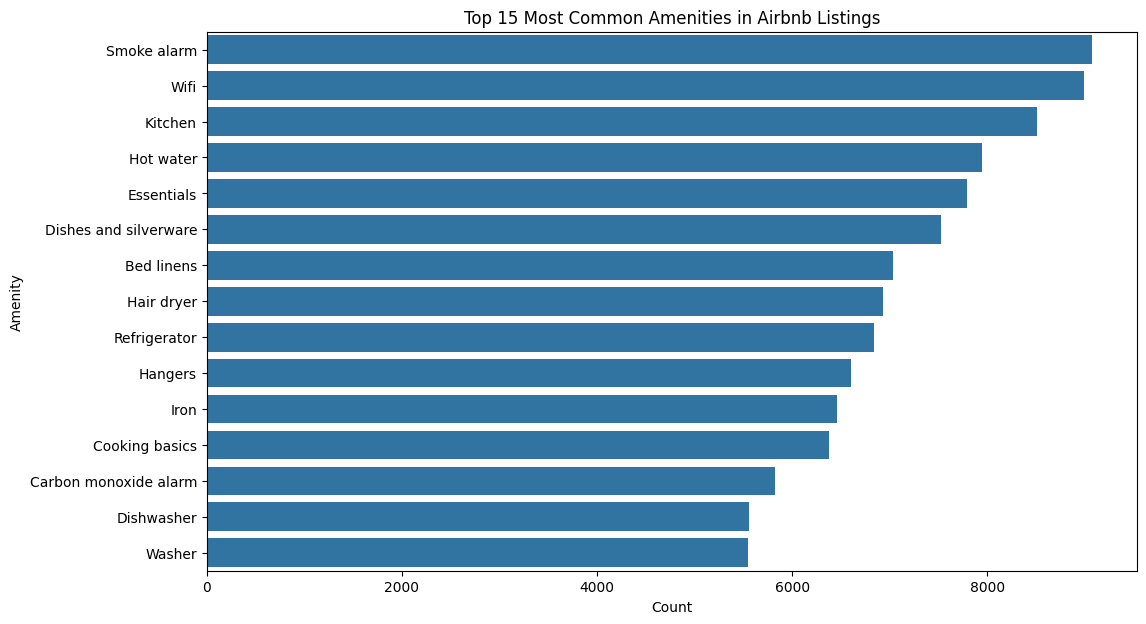

In [26]:
# 4. Top Amenities
from collections import Counter
import ast

amenities_list = []
for amenities in df_amsterdam['amenities']:
    amenities_list.extend(ast.literal_eval(amenities))

amenities_count = Counter(amenities_list)
top_amenities = amenities_count.most_common(15)

amenities_df = pd.DataFrame(top_amenities, columns=['Amenity', 'Count'])
plt.figure(figsize=(12, 7))
sns.barplot(y='Amenity', x='Count', data=amenities_df)
plt.title('Top 15 Most Common Amenities in Airbnb Listings')
plt.show()

<ipython-input-27-4d2729d7a339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['amenities_count'] = df_amsterdam['amenities'].apply(lambda x: len(x.split(',')))
<ipython-input-27-4d2729d7a339>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['amenities_count_binned'] = pd.cut(df_amsterdam['amenities_count'], bins=bins, labels=labels, right=False)


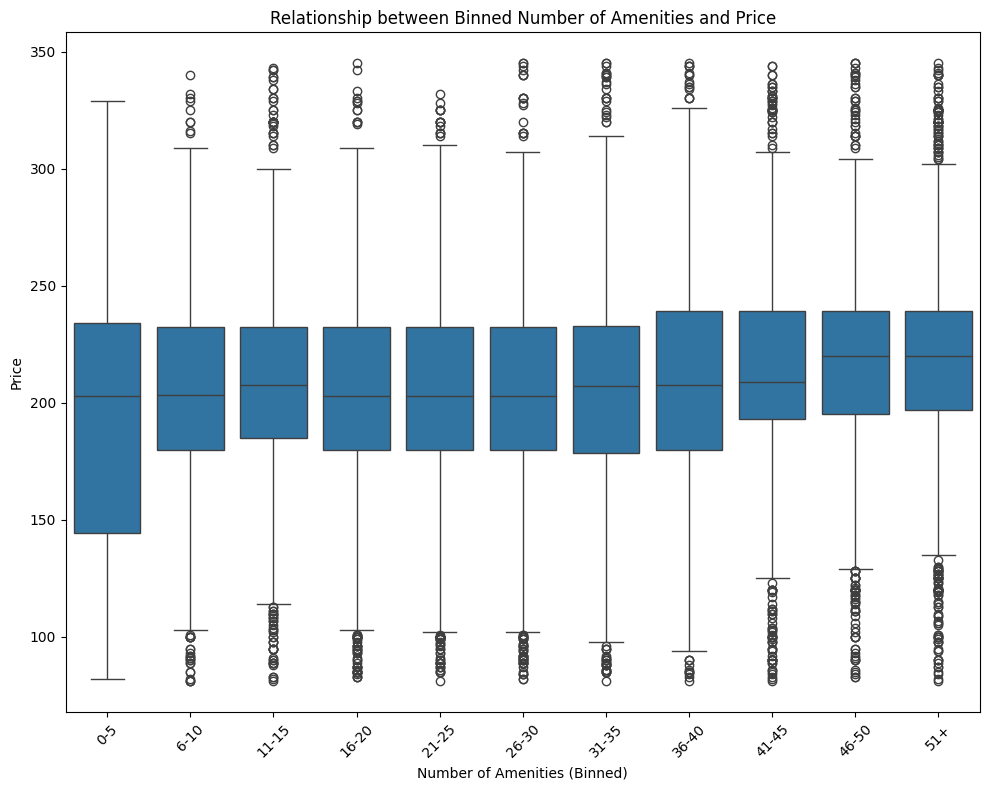

In [27]:
# Calculate amenities_count
df_amsterdam['amenities_count'] = df_amsterdam['amenities'].apply(lambda x: len(x.split(',')))

# Define bins for amenities_count
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, df_amsterdam['amenities_count'].max()]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']

# Create a new column 'amenities_count_binned' that categorizes the amenities_count
df_amsterdam['amenities_count_binned'] = pd.cut(df_amsterdam['amenities_count'], bins=bins, labels=labels, right=False)

# Visualizing the relationship between binned 'amenities_count' and 'price'
plt.figure(figsize=(10, 8))
sns.boxplot(x='amenities_count_binned', y='price', data=df_amsterdam)
plt.title("Relationship between Binned Number of Amenities and Price")
plt.xlabel('Number of Amenities (Binned)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Price Analysis

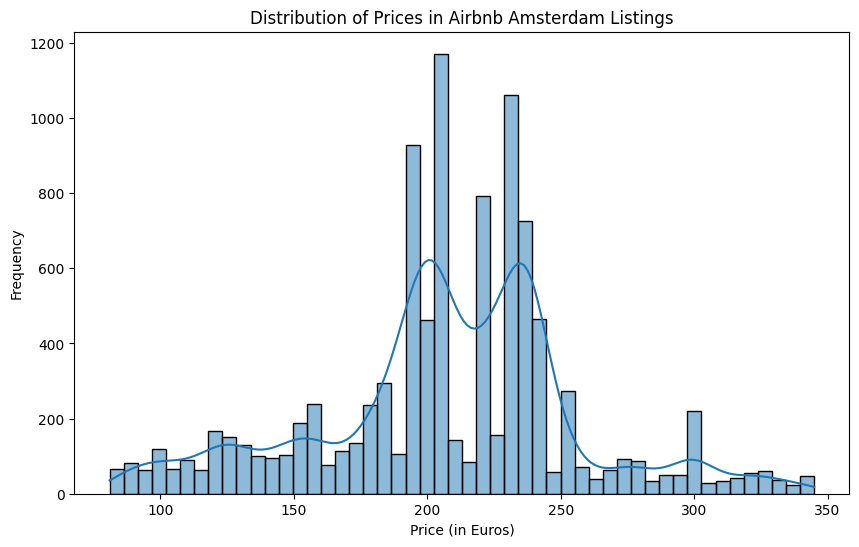

In [28]:
# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_amsterdam['price'], bins=50, kde=True)
plt.title('Distribution of Prices in Airbnb Amsterdam Listings')
plt.xlabel('Price (in Euros)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-29-dcd0254811ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='instant_bookable', y='price', palette='coolwarm')


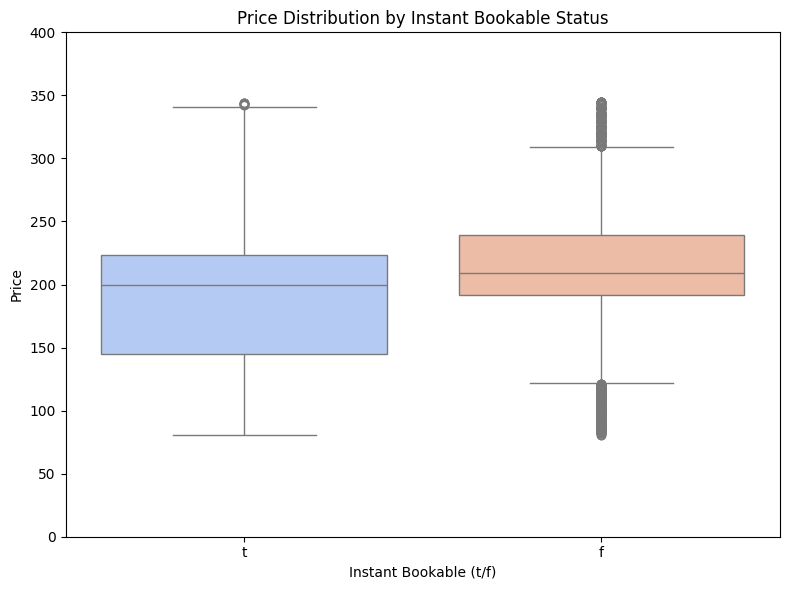

In [29]:
# Price vs Instant Bookable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_amsterdam, x='instant_bookable', y='price', palette='coolwarm')
plt.title('Price Distribution by Instant Bookable Status')
plt.xlabel('Instant Bookable (t/f)')
plt.ylabel('Price')
plt.ylim(0, 400)
plt.tight_layout()
plt.show()

### Global Median Price

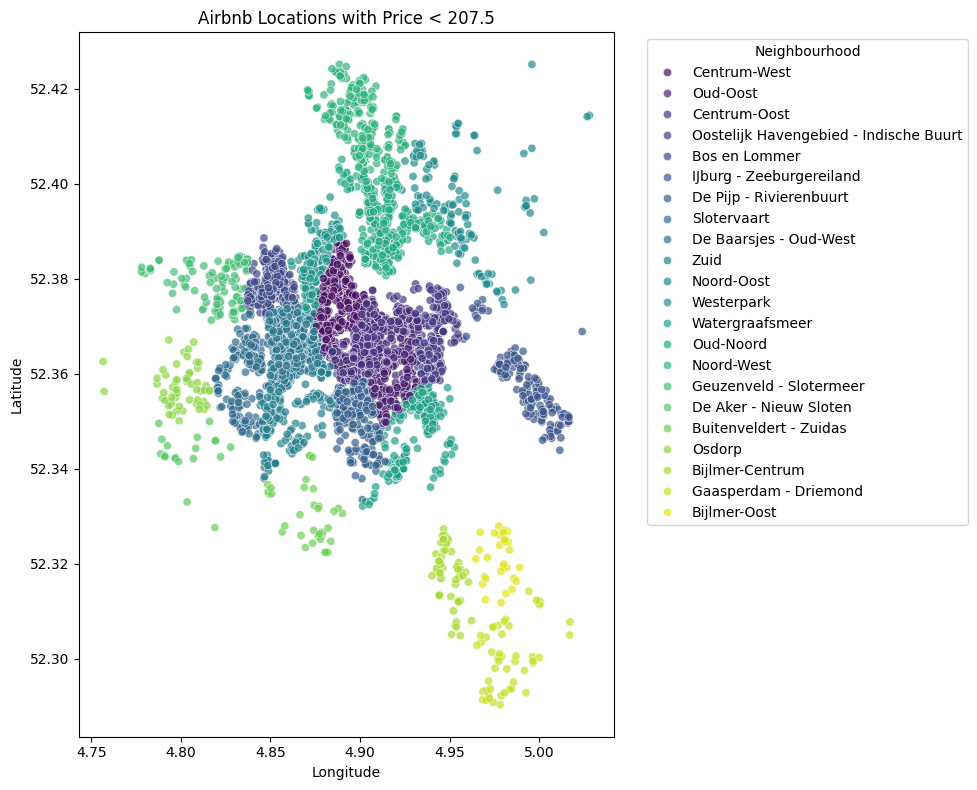

In [30]:
# Calculate the median price
median_price = df_amsterdam['price'].median()

# Filter locations with price less than the median price
low_price = df_amsterdam[df_amsterdam['price'] < median_price]

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=low_price, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='viridis', alpha=0.7)
plt.title(f'Airbnb Locations with Price < {median_price}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.show()

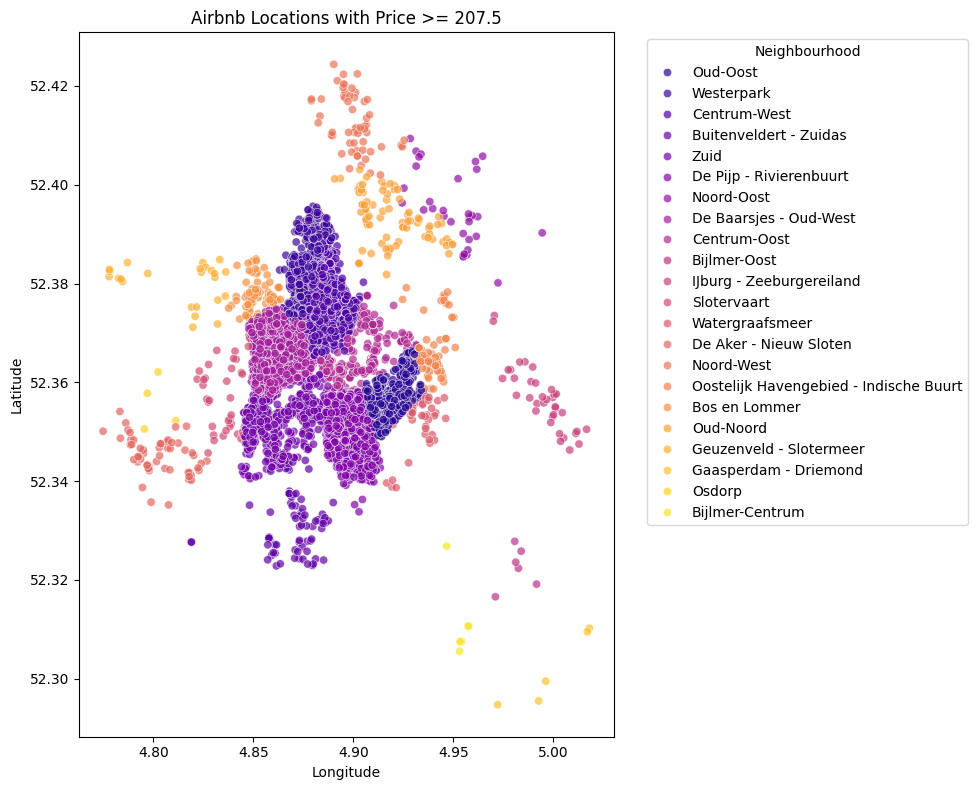

In [31]:
# Calculate the median price
median_price = df_amsterdam['price'].median()

# Filter locations with price greater than or equal to the median price
high_price = df_amsterdam[df_amsterdam['price'] >= median_price]

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=high_price, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='plasma', alpha=0.7)
plt.title(f'Airbnb Locations with Price >= {median_price}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Median Price per Neighbourhood

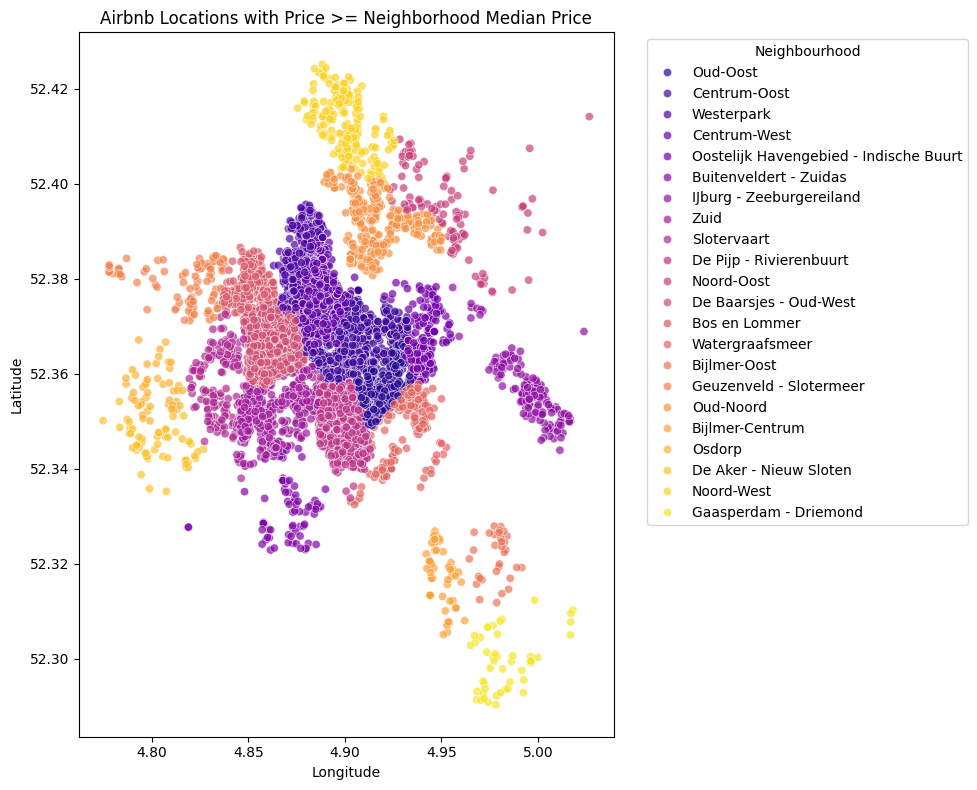

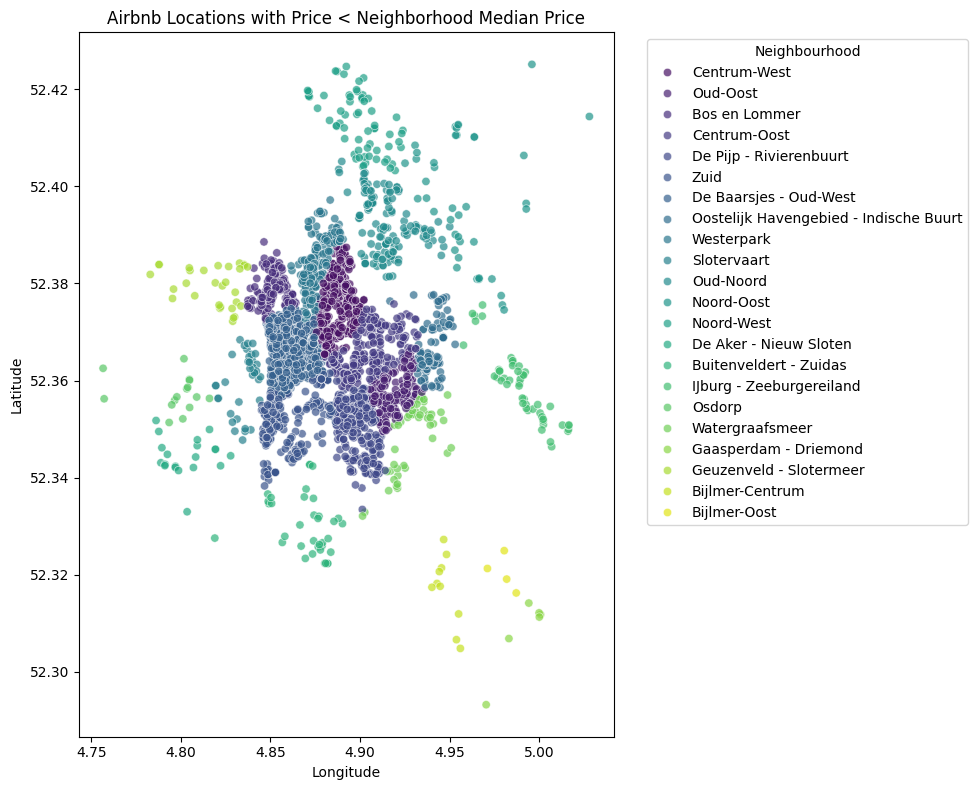

In [32]:
# Step 1: Calculate the median price for each neighborhood
neighbourhood_median_price = df_amsterdam.groupby('neighbourhood_cleansed')['price'].median()

# Step 2: Merge the median price back to the original dataframe
df_amsterdam = df_amsterdam.merge(neighbourhood_median_price, on='neighbourhood_cleansed', suffixes=('', '_neighbourhood_median'))

# Step 3: Create two new columns to classify properties based on price vs. the neighborhood median price
df_amsterdam['price_greater_than_median'] = (df_amsterdam['price'] >= df_amsterdam['price_neighbourhood_median']).astype(int)

# Step 4: Split the data into two groups:
# - One where the price is greater than or equal to the neighborhood median price
# - One where the price is less than the neighborhood median price
high_price_neighbourhood = df_amsterdam[df_amsterdam['price_greater_than_median'] == 1]
low_price_neighbourhood = df_amsterdam[df_amsterdam['price_greater_than_median'] == 0]

# Step 5: Plot the locations where the price is greater than or equal to the neighborhood median price
plt.figure(figsize=(10, 8))
sns.scatterplot(data=high_price_neighbourhood, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='plasma', alpha=0.7)
plt.title('Airbnb Locations with Price >= Neighborhood Median Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 6: Plot the locations where the price is less than the neighborhood median price
plt.figure(figsize=(10, 8))
sns.scatterplot(data=low_price_neighbourhood, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='viridis', alpha=0.7)
plt.title('Airbnb Locations with Price < Neighborhood Median Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


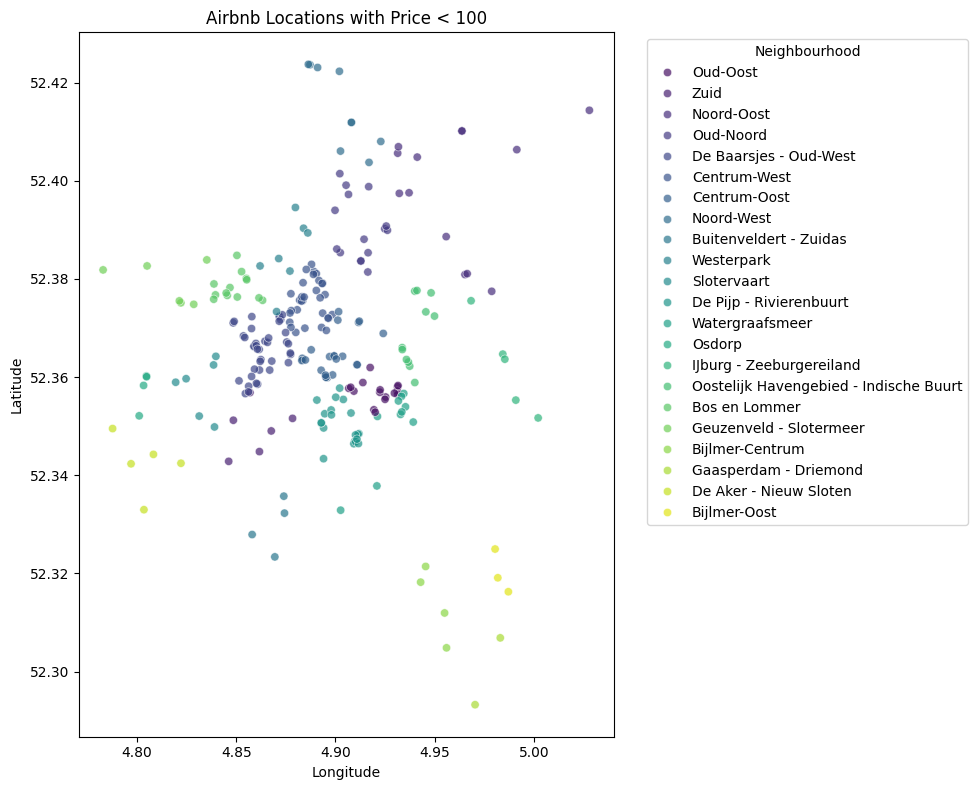

In [33]:
# Airbnb Locations with Price < 100
plt.figure(figsize=(10, 8))
low_price = df_amsterdam[df_amsterdam['price'] < 100]
sns.scatterplot(data=low_price, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='viridis', alpha=0.7)
plt.title('Airbnb Locations with Price < 100')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-34-29b1efa7bdc9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='beds_binned', y='price', palette='coolwarm')
<ipython-input-34-29b1efa7bdc9>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='bedrooms_binned', y='price', palette='viridis')
<ipython-input-34-29b1efa7bdc9>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='bathrooms_binned', y='price', palette='magma')


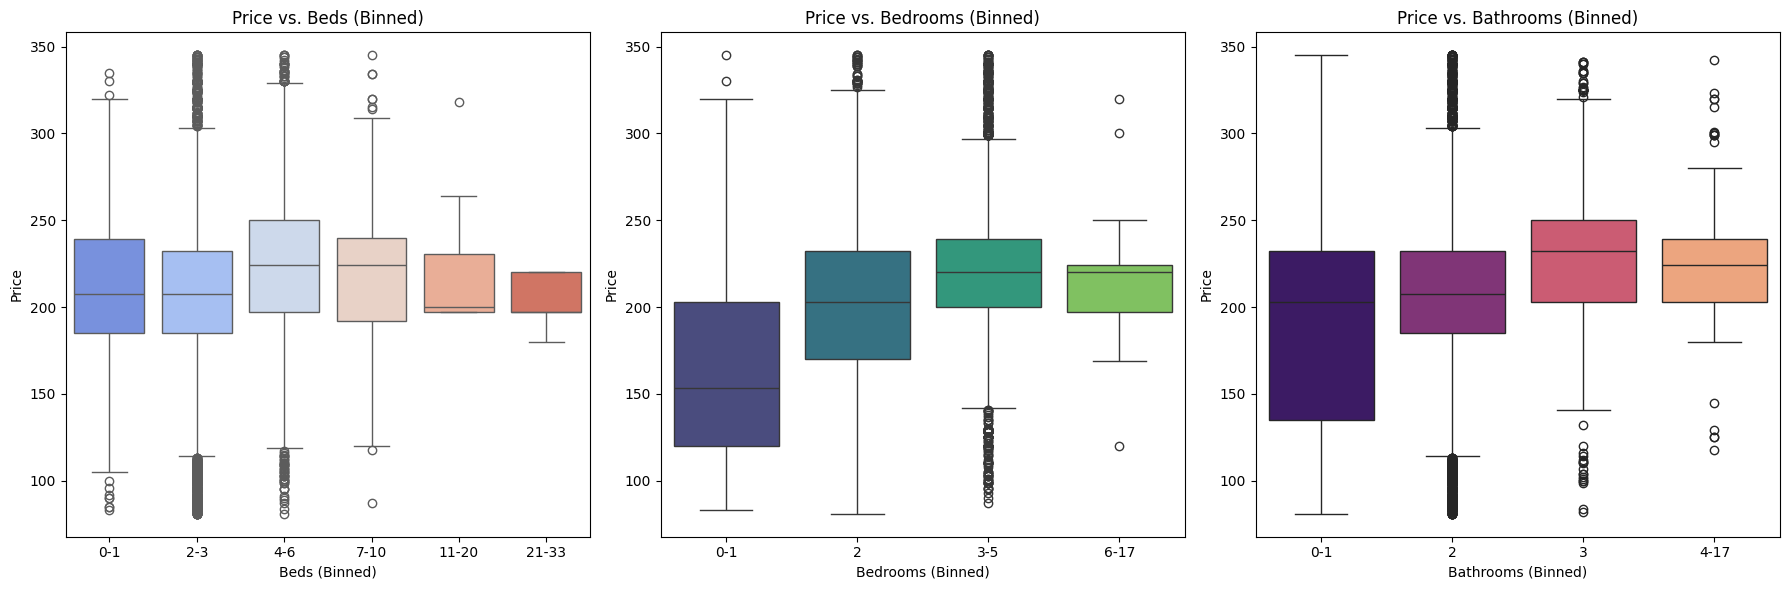

In [34]:
# Bins for 'beds' (0-33)
beds_bins = [0, 1, 3, 6, 10, 20, 33]
beds_labels = ['0-1', '2-3', '4-6', '7-10', '11-20', '21-33']

# Bins for 'bedrooms' (0-17)
bedrooms_bins = [0, 1, 2, 5, 17]
bedrooms_labels = ['0-1', '2', '3-5', '6-17']

# Bins for 'bathrooms' (0-17)
bathrooms_bins = [0, 1, 2, 3, 17]
bathrooms_labels = ['0-1', '2', '3', '4-17']

# Apply the binning to beds, bedrooms, and bathrooms
df_amsterdam['beds_binned'] = pd.cut(df_amsterdam['beds'], bins=beds_bins, labels=beds_labels, right=False)
df_amsterdam['bedrooms_binned'] = pd.cut(df_amsterdam['bedrooms'], bins=bedrooms_bins, labels=bedrooms_labels, right=False)
df_amsterdam['bathrooms_binned'] = pd.cut(df_amsterdam['bathrooms'], bins=bathrooms_bins, labels=bathrooms_labels, right=False)

# Set up the plotting area for boxplots
plt.figure(figsize=(18, 6))

# Boxplot for Price vs Beds (binned)
plt.subplot(1, 3, 1)
sns.boxplot(data=df_amsterdam, x='beds_binned', y='price', palette='coolwarm')
plt.xlabel('Beds (Binned)')
plt.ylabel('Price')
plt.title('Price vs. Beds (Binned)')

# Boxplot for Price vs Bedrooms (binned)
plt.subplot(1, 3, 2)
sns.boxplot(data=df_amsterdam, x='bedrooms_binned', y='price', palette='viridis')
plt.xlabel('Bedrooms (Binned)')
plt.ylabel('Price')
plt.title('Price vs. Bedrooms (Binned)')

# Boxplot for Price vs Bathrooms (binned)
plt.subplot(1, 3, 3)
sns.boxplot(data=df_amsterdam, x='bathrooms_binned', y='price', palette='magma')
plt.xlabel('Bathrooms (Binned)')
plt.ylabel('Price')
plt.title('Price vs. Bathrooms (Binned)')

# Tight layout to ensure no clipping of titles and labels
plt.tight_layout()
plt.show()


<ipython-input-35-2795cc60e526>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='accommodates', y='price', palette='magma')


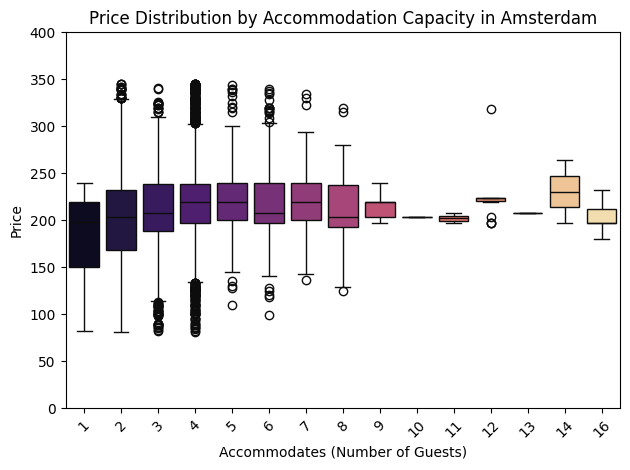

In [35]:
# Create a boxplot
sns.boxplot(data=df_amsterdam, x='accommodates', y='price', palette='magma')

# Labels and title
plt.xlabel('Accommodates (Number of Guests)')
plt.ylabel('Price')
plt.title('Price Distribution by Accommodation Capacity in Amsterdam')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Limit the y-axis up to 2000
plt.ylim(0, 400)  # Set the upper limit of the y-axis to 2000

# Display the adjusted plot
plt.tight_layout()
plt.show()

###Number of reviews and price

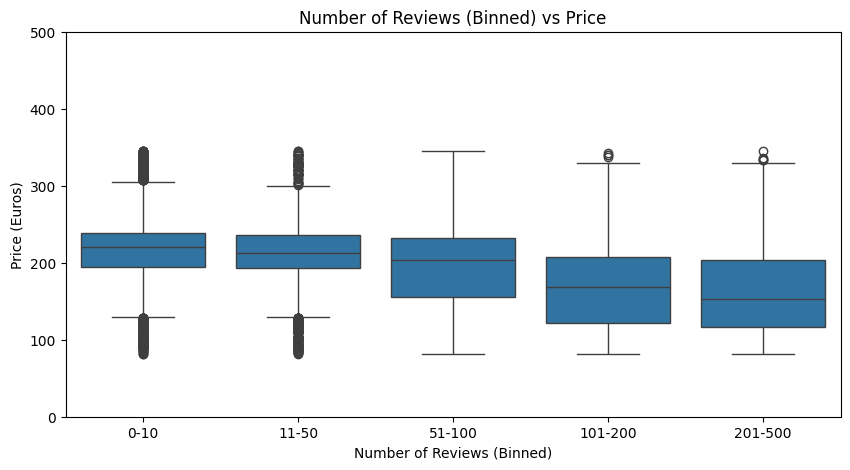

In [36]:
# Relationship between number of reviews and price (Binned for clarity)
bins = [0, 10, 50, 100, 200, 500]
labels = ["0-10", "11-50", "51-100", "101-200", "201-500"]
df_amsterdam['review_bins'] = pd.cut(df_amsterdam['number_of_reviews'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,5))
sns.boxplot(x=df_amsterdam['review_bins'], y=df_amsterdam['price'])
plt.title("Number of Reviews (Binned) vs Price")
plt.xlabel("Number of Reviews (Binned)")
plt.ylabel("Price (Euros)")
plt.ylim(0, 500)
plt.show()


In [37]:
# Define a threshold for 'cheap' and 'expensive'
price_threshold = df_amsterdam['price'].median()

# Cheap properties
cheap_properties = df_amsterdam[df_amsterdam['price'] <= price_threshold]

# Expensive properties
expensive_properties = df_amsterdam[df_amsterdam['price'] > price_threshold]

# Compare amenities and ratings between cheap and expensive properties
print("Comparison between cheap and expensive properties:")
print("Cheap properties - Average amenities_count:", cheap_properties['amenities_count'].mean())
print("Expensive properties - Average amenities_count:", expensive_properties['amenities_count'].mean())

print("\nNeighborhood rating in cheap vs. expensive properties:")
print("Cheap properties - Average review_scores_location:", cheap_properties['review_scores_location'].mean())
print("Expensive properties - Average review_scores_location:", expensive_properties['review_scores_location'].mean())


Comparison between cheap and expensive properties:
Cheap properties - Average amenities_count: 31.05222031637126
Expensive properties - Average amenities_count: 33.54022988505747

Neighborhood rating in cheap vs. expensive properties:
Cheap properties - Average review_scores_location: 4.792862588145607
Expensive properties - Average review_scores_location: 4.845951933124347


### Location Influence

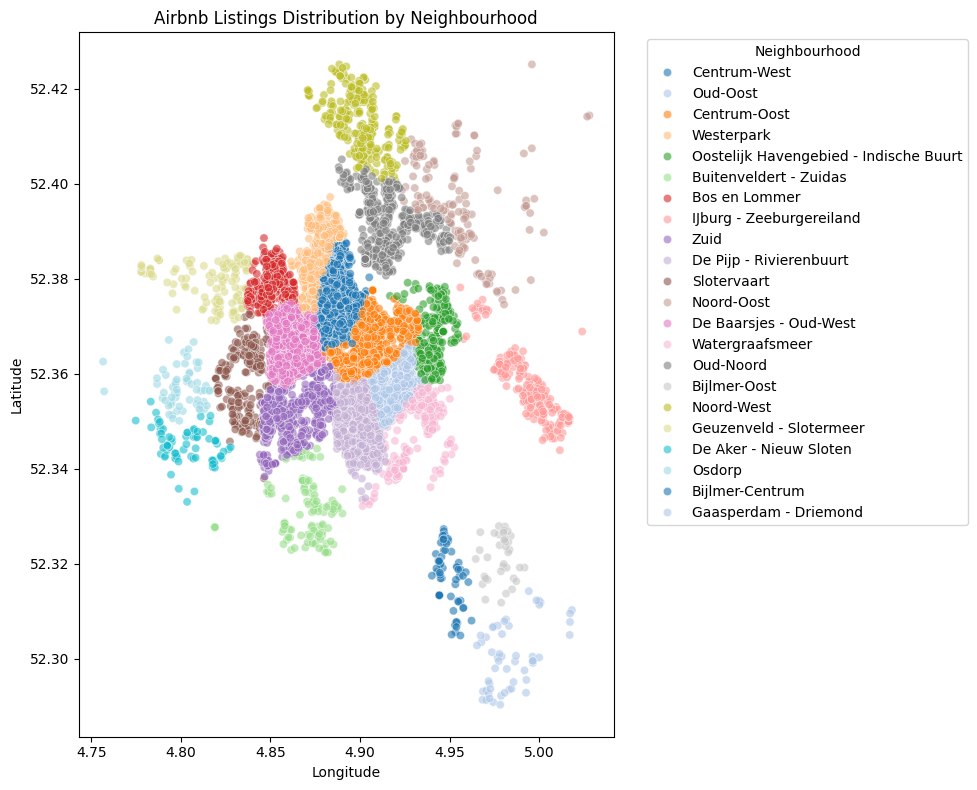

In [38]:
# Airbnb Distribution by Longitude and Latitude
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_amsterdam, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='tab20', alpha=0.6)
plt.title('Airbnb Listings Distribution by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

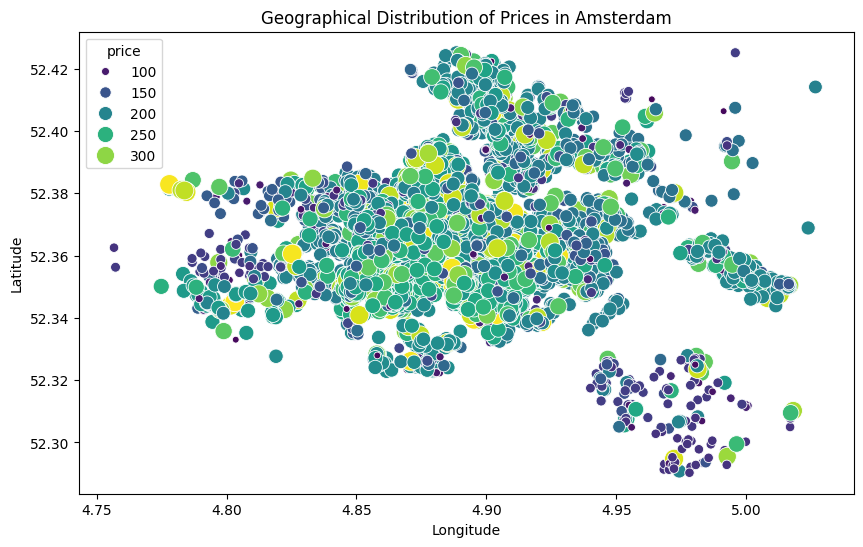

In [39]:
# 3. Location Impact on Pricing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_amsterdam, x='longitude', y='latitude', hue='price', palette='viridis', size='price', sizes=(20, 200))
plt.title('Geographical Distribution of Prices in Amsterdam')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<ipython-input-40-5ddce75d5e73>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_by_neighbourhood, x='price', y='neighbourhood_cleansed', palette='viridis')


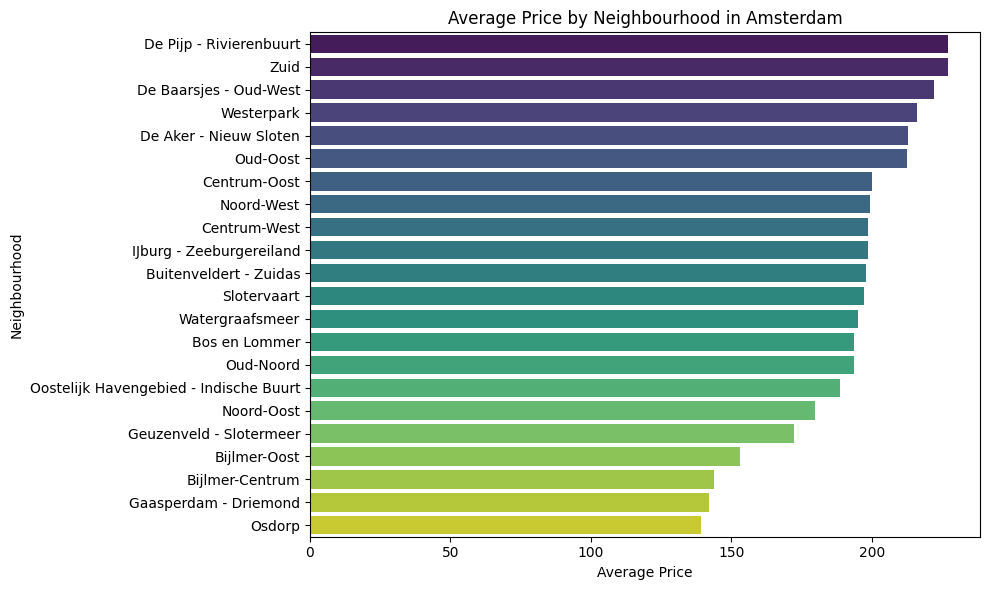

In [40]:
# Calculate average price by neighborhood
price_by_neighbourhood = df_amsterdam.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Sort neighborhoods by average price in descending order
price_by_neighbourhood = price_by_neighbourhood.sort_values(by='price', ascending=False)

# Visualization using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=price_by_neighbourhood, x='price', y='neighbourhood_cleansed', palette='viridis')

plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('Average Price by Neighbourhood in Amsterdam')
plt.tight_layout()

plt.show()

<ipython-input-41-21f1f1a33b2b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighborhood_counts, x='Listings', y='Neighborhood', palette='viridis')


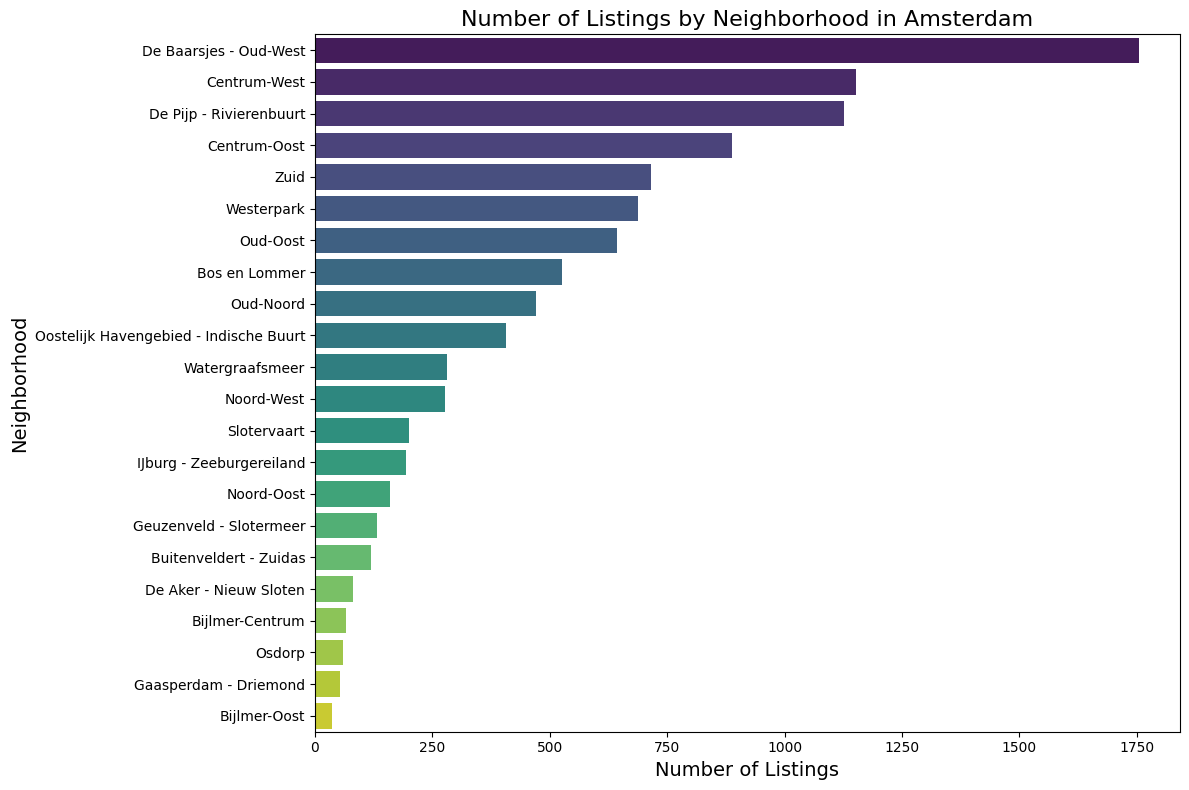

In [41]:
# Count the number of listings per neighborhood
neighborhood_counts = df_amsterdam['neighbourhood_cleansed'].value_counts().reset_index()
neighborhood_counts.columns = ['Neighborhood', 'Listings']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=neighborhood_counts, x='Listings', y='Neighborhood', palette='viridis')

# Add titles and labels
plt.title('Number of Listings by Neighborhood in Amsterdam', fontsize=16)
plt.xlabel('Number of Listings', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)

# Improve layout
plt.tight_layout()
plt.show()

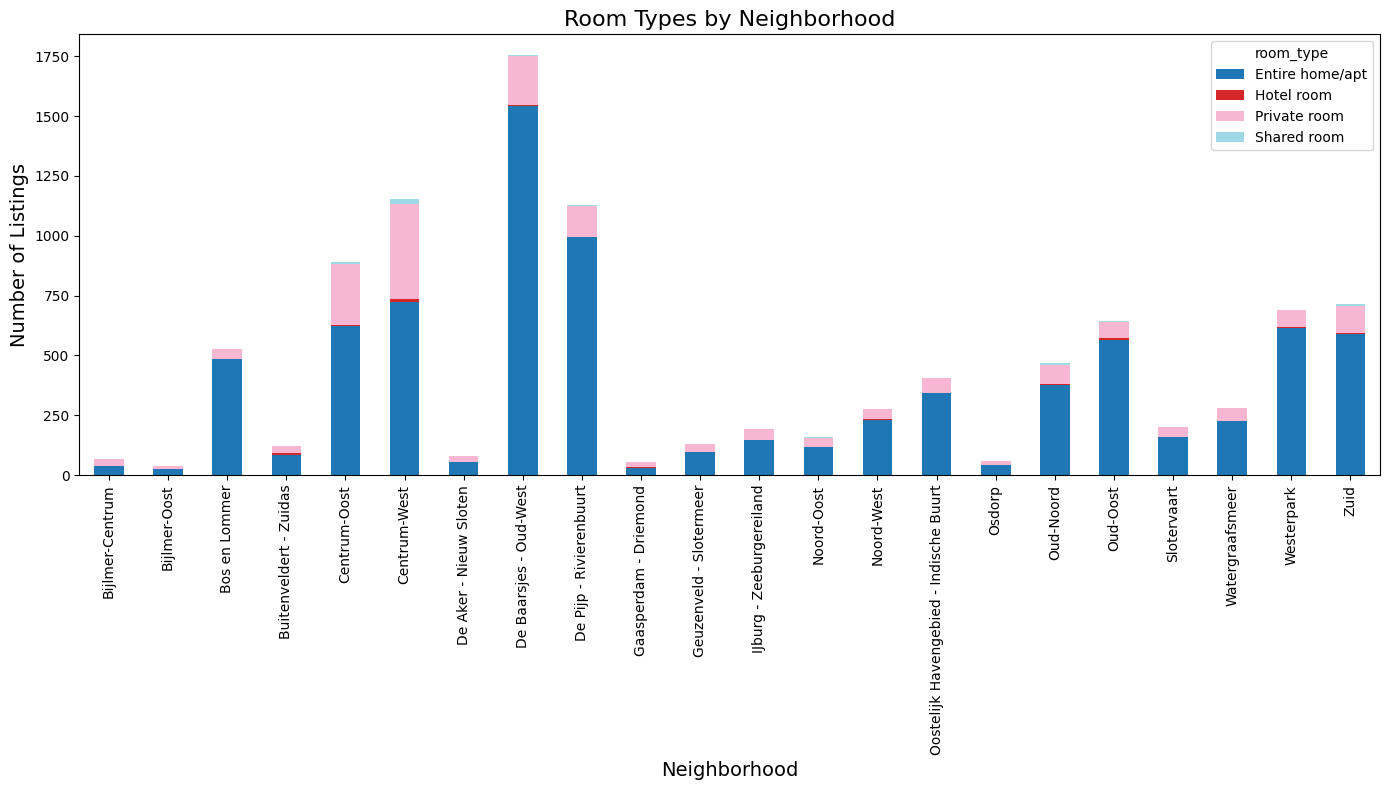

In [42]:
import matplotlib.pyplot as plt

# Create a cross-tabulation of neighborhood and room type
property_neighborhood = pd.crosstab(df_amsterdam['neighbourhood_cleansed'], df_amsterdam['room_type'])

# Plot a stacked bar chart with a more vibrant color palette
plt.figure(figsize=(14, 8))
property_neighborhood.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Add titles and labels
plt.title('Room Types by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

# Improve layout and rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-43-e8beeecc8168>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='review_scores_location_binned', y='price', palette='coolwarm')


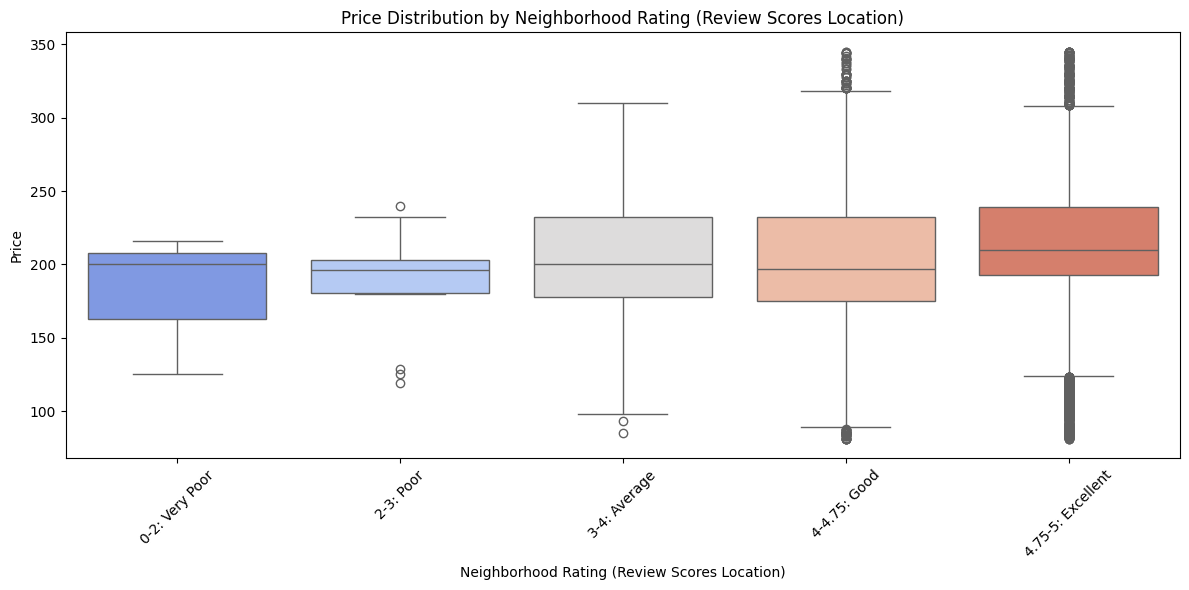

In [43]:
# Define the bins and labels for categorization based on review_scores_location
bins = [0, 2.0, 3.0, 4.0, 4.75, 5.0]  # Defined bins for different rating ranges
labels = [0, 1, 2, 3, 4]  # Categories: 0, 1, 2, 3, and 4 for review scores location

# Apply binning to the 'review_scores_location' column
df_amsterdam['review_scores_location_binned'] = pd.cut(df_amsterdam['review_scores_location'], bins=bins, labels=labels, include_lowest=True)

# Define what each category represents
category_descriptions = {
    0: '0-2: Very Poor',
    1: '2-3: Poor',
    2: '3-4: Average',
    3: '4-4.75: Good',
    4: '4.75-5: Excellent'
}

# Create the labels without the count for each bin
bin_labels = [category_descriptions[label] for label in labels]

# Visualizing the relationship between 'review_scores_location_binned' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_amsterdam, x='review_scores_location_binned', y='price', palette='coolwarm')

# Title and labels
plt.title('Price Distribution by Neighborhood Rating (Review Scores Location)')
plt.xlabel('Neighborhood Rating (Review Scores Location)')
plt.ylabel('Price')

# Update the x-axis labels to include only the description
plt.xticks(ticks=range(len(labels)), labels=bin_labels, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Room Type


Room Type Distribution (Percentage):
room_type
Entire home/apt    80.921053
Private room       17.842903
Shared room         0.687799
Hotel room          0.548246
Name: proportion, dtype: float64


<ipython-input-44-20d0506624c2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df_amsterdam, palette='Set2')


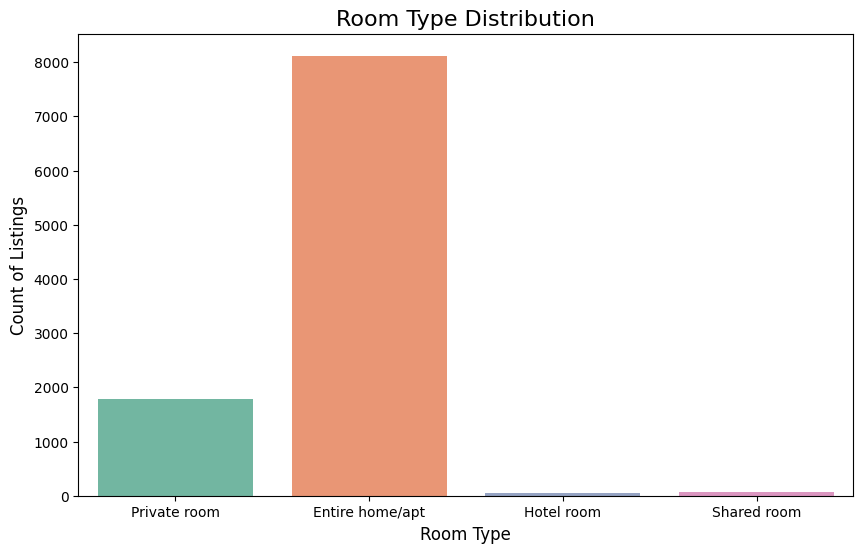

In [44]:
# Room Type Distribution (Percentage of each room type)
room_type_counts = df_amsterdam['room_type'].value_counts(normalize=True) * 100
print("\nRoom Type Distribution (Percentage):")
print(room_type_counts)

# Visualizing Room Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df_amsterdam, palette='Set2')
plt.title('Room Type Distribution', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Count of Listings', fontsize=12)
plt.show()

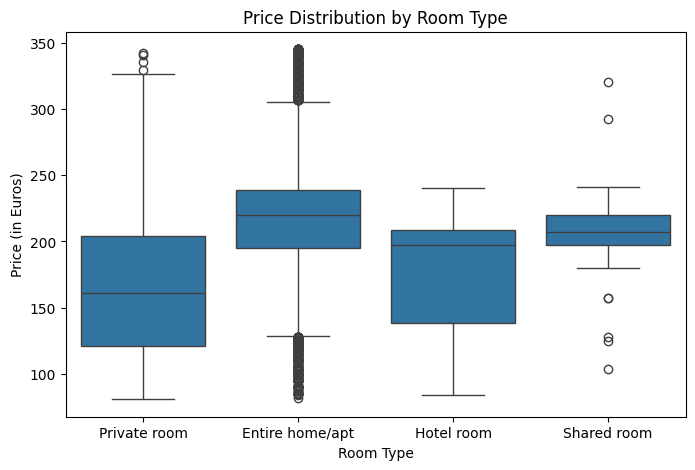

In [45]:
# 5. Room Type vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=df_amsterdam)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (in Euros)')
plt.show()

### Host Information

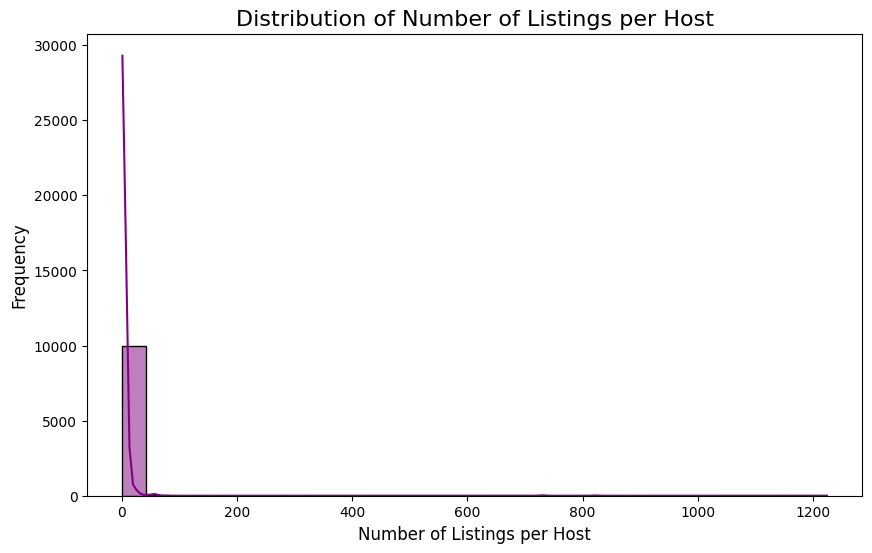

In [46]:
# Visualizing the number of listings per host (host_listings_count)
plt.figure(figsize=(10, 6))
sns.histplot(df_amsterdam['host_listings_count'], kde=True, color='purple', bins=30)
plt.title('Distribution of Number of Listings per Host', fontsize=16)
plt.xlabel('Number of Listings per Host', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

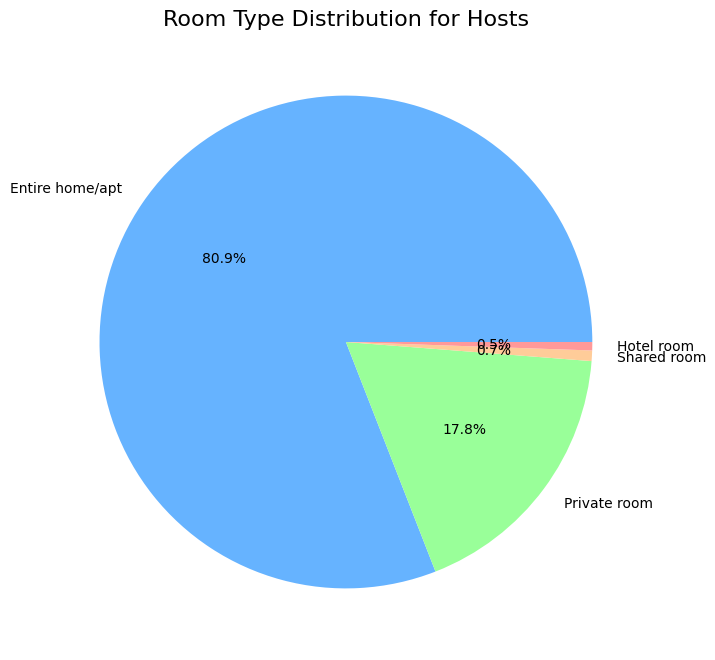

In [47]:
# Plot a pie chart to show the distribution of room types (for host listings)
room_type_counts = df_amsterdam['room_type'].value_counts()
plt.figure(figsize=(8, 8))
room_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
plt.title('Room Type Distribution for Hosts', fontsize=16)
plt.ylabel('')
plt.show()

<ipython-input-48-5c90b3c5c9e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_price_by_superhost, x='host_is_superhost', y='price', palette='coolwarm')


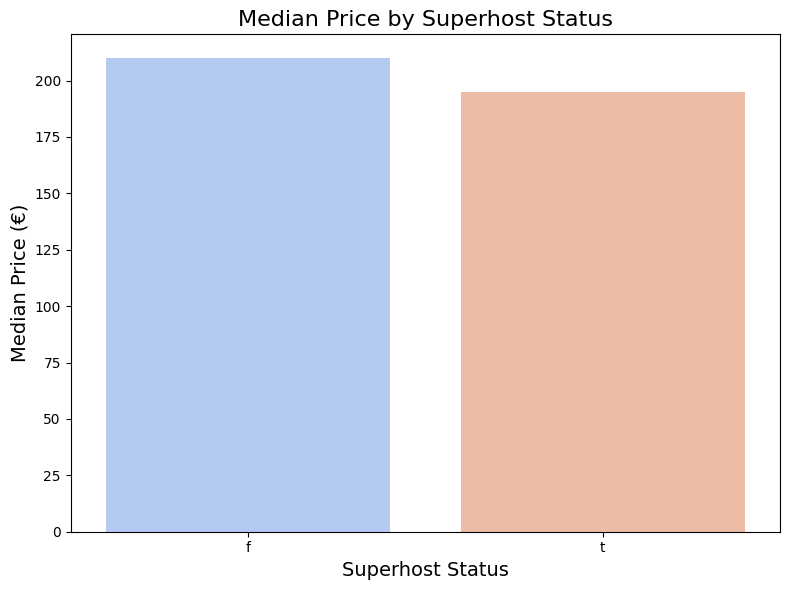

In [48]:
# Calculate the median price by superhost status
median_price_by_superhost = df_amsterdam.groupby('host_is_superhost')['price'].median().reset_index()

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=median_price_by_superhost, x='host_is_superhost', y='price', palette='coolwarm')

# Add labels and title
plt.xlabel('Superhost Status', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.title('Median Price by Superhost Status', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-49-bf3b5eda95e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='host_listings_count_binned', y='price', palette='coolwarm')


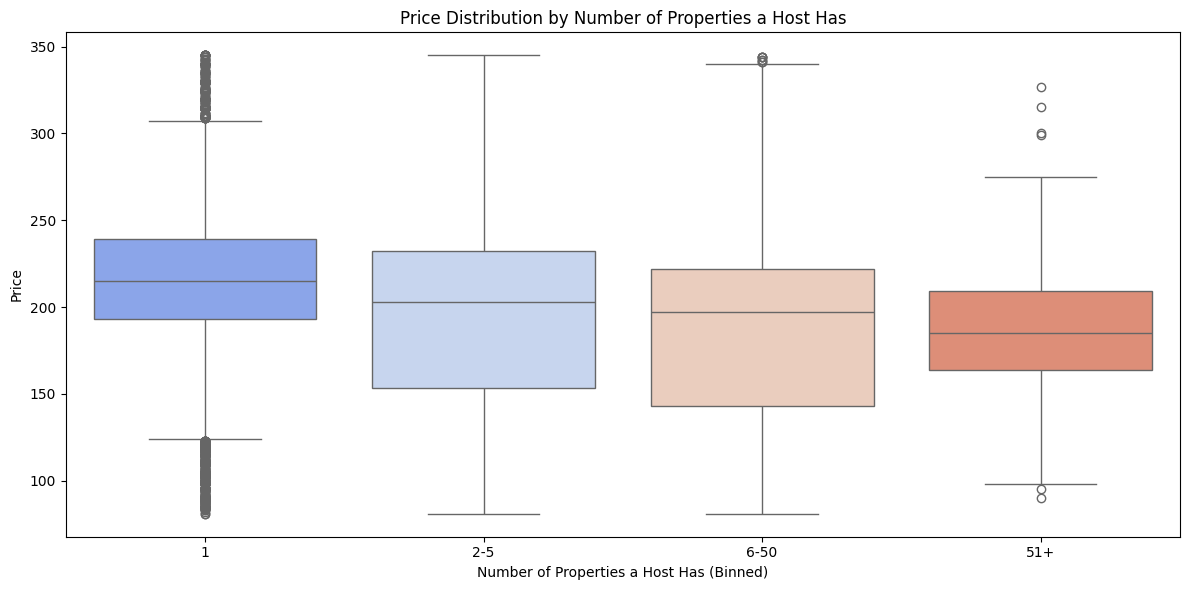

                     host_listings_count     price
host_listings_count             1.000000 -0.021288
price                          -0.021288  1.000000


In [49]:
# Define the new bins for host_listings_count based on the updated statistics
bins = [0, 1, 5, 50, 1224]  # Corresponding bin edges
labels = ['1', '2-5', '6-50', '51+']  # Categories for the bins

# Apply binning to 'host_listings_count'
df_amsterdam['host_listings_count_binned'] = pd.cut(df_amsterdam['host_listings_count'], bins=bins, labels=labels, include_lowest=True)

# Visualizing the relationship between binned 'host_listings_count' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_amsterdam, x='host_listings_count_binned', y='price', palette='coolwarm')

# Title and labels
plt.title("Price Distribution by Number of Properties a Host Has")
plt.xlabel("Number of Properties a Host Has (Binned)")
plt.ylabel("Price")

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the correlation between 'host_listings_count_binned' and 'price'
host_properties_price_correlation = df_amsterdam[['host_listings_count', 'price']].corr()
print(host_properties_price_correlation)



### Review Information

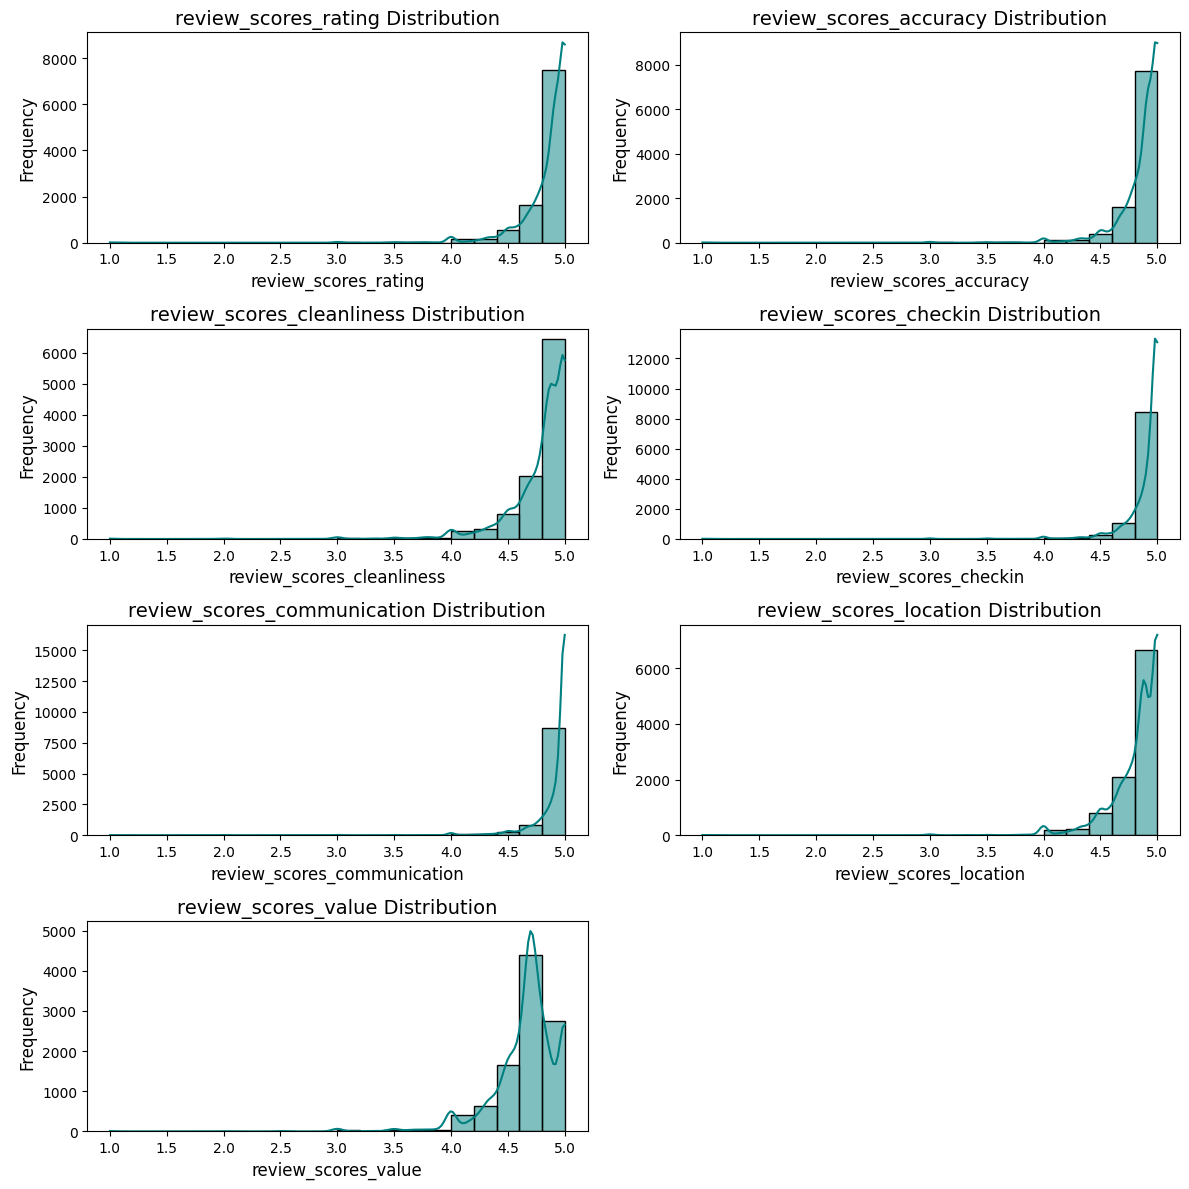

In [50]:
# Distribution of review scores
review_scores = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Creating a subplot for review scores distribution (Updated grid size)
plt.figure(figsize=(12, 12))

# Adjusting the grid layout for 7 review score columns
for i, col in enumerate(review_scores, 1):
    plt.subplot(4, 2, i)  # Using 4 rows and 2 columns
    sns.histplot(df_amsterdam[col], kde=True, bins=20, color='teal')
    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-51-0d218b5752be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='review_scores_rating', data=df_amsterdam, palette='muted')


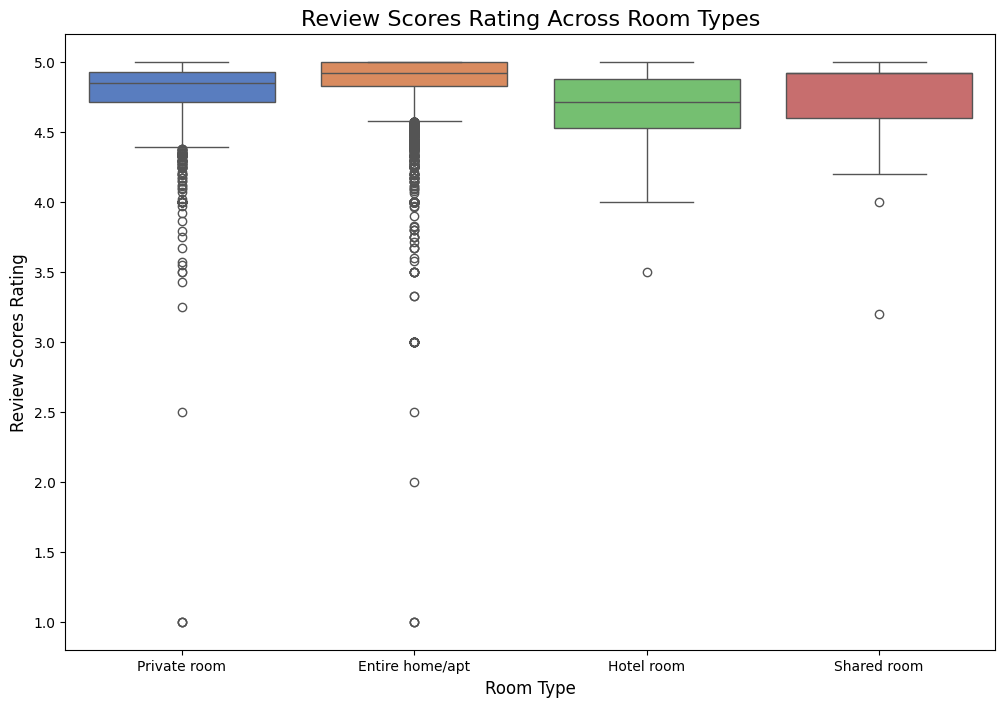

In [51]:
# Boxplot for review scores across different room types
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='review_scores_rating', data=df_amsterdam, palette='muted')
plt.title('Review Scores Rating Across Room Types', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Review Scores Rating', fontsize=12)
plt.show()

<ipython-input-52-5228300abc73>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amsterdam, x='review_scores_rating_binned', y='price', palette='viridis')


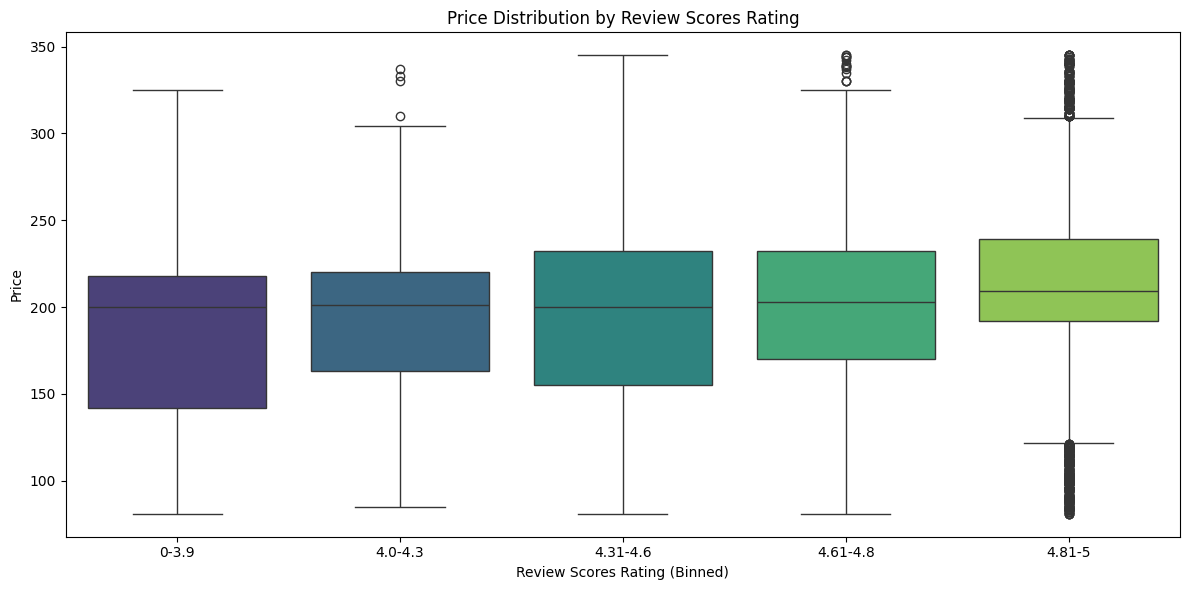

                      review_scores_rating     price
review_scores_rating              1.000000  0.129031
price                             0.129031  1.000000


In [52]:
# Define the bins based on the updated ranges
bins = [0, 3.9, 4.3, 4.6, 4.8, 5.0]  # Merging the last two categories
labels = ['0-3.9', '4.0-4.3', '4.31-4.6', '4.61-4.8', '4.81-5']  # Merged last two categories

# Apply binning to 'review_scores_rating'
df_amsterdam['review_scores_rating_binned'] = pd.cut(df_amsterdam['review_scores_rating'], bins=bins, labels=labels, include_lowest=True)

# Visualizing the relationship between binned 'review_scores_rating' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_amsterdam, x='review_scores_rating_binned', y='price', palette='viridis')

# Title and labels
plt.title("Price Distribution by Review Scores Rating")
plt.xlabel("Review Scores Rating (Binned)")
plt.ylabel("Price")

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the correlation between 'review_scores_rating_binned' and 'price'
review_scores_price_correlation = df_amsterdam[['review_scores_rating', 'price']].corr()
print(review_scores_price_correlation)


### Availability


First 5 rows with availability percentage:
   availability_365  availability_percentage
0               207                56.712329
1               334                91.506849
2               247                67.671233
3                 0                 0.000000
4                 0                 0.000000


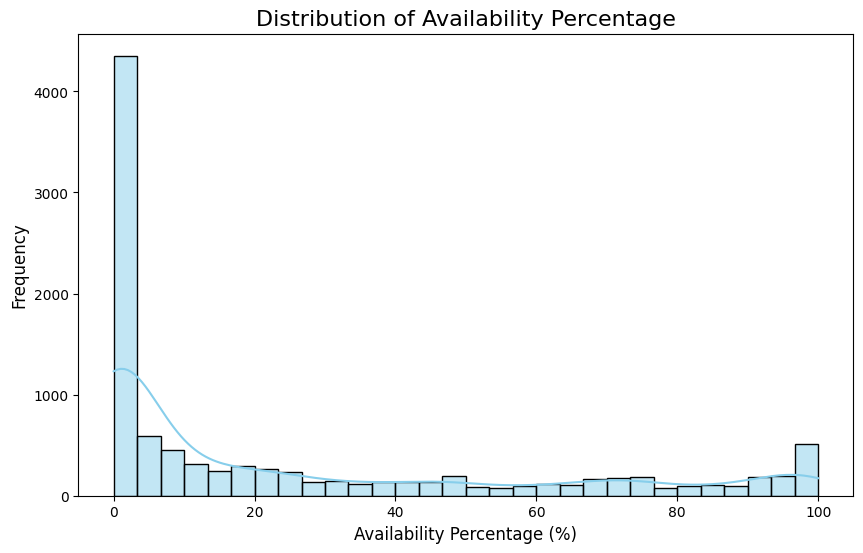

In [53]:
# Compute percentage of availability for the year (availability_365)
df_amsterdam['availability_percentage'] = (df_amsterdam['availability_365'] / 365) * 100

# Display the new availability_percentage column
print("\nFirst 5 rows with availability percentage:")
print(df_amsterdam[['availability_365', 'availability_percentage']].head())

# Visualizing availability percentage distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_amsterdam['availability_percentage'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Availability Percentage', fontsize=16)
plt.xlabel('Availability Percentage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


##FEATURE ENGINEERING

### Feature Creation

#### High Demand Variable

In [54]:
# Calculate the median number of reviews
median_reviews = df_amsterdam['number_of_reviews'].median()

# Assign high_demand based on whether the number of reviews is greater than the median
df_amsterdam['high_demand'] = (df_amsterdam['number_of_reviews'] > median_reviews).astype(int)


#### Amenities Count Variable

In [55]:
# 2. Count the number of amenities listed in the property
# This feature counts how many amenities are listed by splitting the 'amenities' column by commas and counting the entries.
df_amsterdam['amenities_count'] = df_amsterdam['amenities'].apply(
    lambda x: len(str(x).split(',')) if isinstance(x, str) else 0)

#### Host Days Active Variable

In [56]:
# Ensure the columns are in datetime format
df_amsterdam['host_since'] = pd.to_datetime(df_amsterdam['host_since'], errors='coerce')
df_amsterdam['last_scraped'] = pd.to_datetime(df_amsterdam['last_scraped'], errors='coerce')

# Calculate the number of active days for the host using .dt.days
df_amsterdam['host_days_active'] = (df_amsterdam['last_scraped'] - df_amsterdam['host_since']).dt.days

#### Host Response Rate Variable

In [57]:
# Bin 'host_response_rate' into four categories
df_amsterdam['host_response_rate'] = pd.cut(
    df_amsterdam['host_response_rate'],
    bins=[0, 50, 80, 95, 100],
    labels=['0-49%', '50-79%', '80-94%', '95-100%'],
    include_lowest=True)

# Convert to string type
df_amsterdam['host_response_rate'] = df_amsterdam['host_response_rate'].astype('str')

#### Host Acceptance Rate Variable

In [58]:
# Bin 'host_acceptance_rate' into four categories
df_amsterdam['host_acceptance_rate'] = pd.cut(
    df_amsterdam['host_acceptance_rate'],
    bins=[0, 50, 70, 90, 100],
    labels=['0-49%', '50-69%', '70-89%', '90-100%'],
    include_lowest=True
)

# Convert to string type
df_amsterdam['host_acceptance_rate'] = df_amsterdam['host_acceptance_rate'].astype('str')

#### Days since First Review & Days since Last Review Variables

In [59]:
# Ensure 'last_review' is in datetime format, and handle errors gracefully
df_amsterdam['last_review'] = pd.to_datetime(df_amsterdam['last_review'], errors='coerce')

# Set 'last_review' to NaT (Not a Time) where it was imputed as 'Unknown'
df_amsterdam.loc[df_amsterdam['last_review'] == 'unknown', 'last_review'] = pd.NaT

# Calculate the days since the last review, but only for non-NaT values
df_amsterdam['days_since_last_review'] = (df_amsterdam['last_scraped'] - df_amsterdam['last_review']).dt.days

# Optional: Replace NaN values (if any) resulting from 'Unknown' or missing data
df_amsterdam['days_since_last_review'].fillna('unknown', inplace=True)

# Ensure 'first_review' is in datetime format, and handle errors gracefully
df_amsterdam['first_review'] = pd.to_datetime(df_amsterdam['first_review'], errors='coerce')

# Set 'first_review' to NaT (Not a Time) where it was imputed as 'Unknown'
df_amsterdam.loc[df_amsterdam['first_review'] == 'unknown', 'first_review'] = pd.NaT

# Calculate the days since the first review, but only for non-NaT values
df_amsterdam['days_since_first_review'] = (df_amsterdam['last_scraped'] - df_amsterdam['first_review']).dt.days

# Optional: Replace NaN values (if any) resulting from 'Unknown' or missing data
df_amsterdam['days_since_first_review'].fillna('unknown', inplace=True)


def bin_column(df, col, bins, labels, na_label='unknown'):

    # Convert the column to numeric (coerce errors to NaN for non-numeric values)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Binning the column only for valid numbers (ignoring 'unknown' values)
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

    # Convert the column to string
    df[col] = df[col].astype('str')

    # Handle 'NaT' (missing values) separately
    # Replace 'nan' with the 'unknown' label
    df[col] = df[col].replace('nan', na_label)

# Binning 'days_since_last_review' based on the distribution
bin_column(df_amsterdam, 'days_since_last_review',
           bins=[0, 30, 180, 365, 730, 1460, 3990],  # 0-1 month, 1-6 months, 6 months-1 year, 1-2 years, 2-4 years, >4 years
           labels=['0-1 month', '1-6 months', '6 months-1 year', '1-2 years', '2-4 years', '>4 years'],
           na_label='no reviews')

# Binning 'days_since_first_review' based on the distribution
bin_column(df_amsterdam, 'days_since_first_review',
           bins=[0, 365, 730, 1460, 3650, 5731],  # 0-1 year, 1-2 years, 2-4 years, 4-10 years, >10 years
           labels=['0-1 year', '1-2 years', '2-4 years', '4-10 years', '>10 years'],
           na_label='no reviews')

<ipython-input-59-c82f123eb91d>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_amsterdam['days_since_last_review'].fillna('unknown', inplace=True)
<ipython-input-59-c82f123eb91d>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_amsterdam['days_since_last_review'].fillna('unknown', inplace=True)
<ipython-input-59-c82f123eb91d>:23: FutureW

#### Extracting most common Amenities

In [60]:
# Create dictionary with frequency counts for list of amenities
amenities_dict = {}
for i in df_amsterdam.amenities:
    j = i[1:-1:].split(",")
    for k in j:
        if k in amenities_dict.keys():
            amenities_dict[k] += 1
        else:
            amenities_dict[k] = 1

amenities = pd.DataFrame(amenities_dict.values(),index=amenities_dict.keys()).sort_values(0,ascending=False).reset_index().rename({"index":"amenities",
                                                                                                0:"frequencies"},axis=1)
amenities["percentage"] = (amenities.frequencies/len(df_amsterdam))*100
amenities
amenities

amenities  frequencies  \
0                                         "Smoke alarm"         9073   
1                                                "Wifi"         8844   
2                                             "Kitchen"         8507   
3                                           "Hot water"         7948   
4                                          "Essentials"         7789   
5                               "Dishes and silverware"         7523   
6                                          "Bed linens"         6933   
7                                          "Hair dryer"         6929   
8                                        "Refrigerator"         6814   
9                                                "Iron"         6460   
10                                            "Hangers"         6362   
11                                     "Cooking basics"         6248   
12                              "Carbon monoxide alarm"         5776   
13                                             "Washer"         5539   
14                                "Dedicated workspace"         5527   
15                                         "Dishwasher"         5411   
16                                            "Shampoo"         5325   
17                                            "Heating"         5283   
18                                   "Hot water kettle"         4946   
19                                       "Wine glasses"         4836   
20                                       "Dining table"         4806   
21                                  "Cleaning products"         4694   
22                                  "Fire extinguisher"         4682   
23                                                 "TV"         4543   
24                                          "Microwave"         4536   
25                                   "Private entrance"         4261   
26                                               "Oven"         4216   
27                                      "First aid kit"         4193   
28                                       "Coffee maker"         4056   
29                                             "Coffee"         3827   
30                         "Extra pillows and blankets"         3599   
31                                         "Shower gel"         3453   
32                           "Drying rack for clothing"         3375   
33                                          "Body soap"         3280   
34                                    "Host greets you"         3247   
35                           "Private patio or balcony"         3067   
36                                "Outdoor dining area"         2917   
37                                    "Central heating"         2900   
38                              "Room-darkening shades"         2897   
39                                  "Outdoor furniture"         2858   
40                                              "Stove"         2819   
41                                            "Toaster"         2587   
42                                            "Bathtub"         2568   
43                                      "Self check-in"         2550   
44                            "Luggage dropoff allowed"         2420   
45                                  "Laundromat nearby"         2413   
46                         "Books and reading material"         2367   
47                                            "Freezer"         2367   
48                                            "Blender"         2305   
49                                            "Freezer"         2059   
50                                      "Portable fans"         2008   
51                           "Paid parking on premises"         1982   
52                            "Long term stays allowed"         1973   
53                          "Free dryer \u2013 In unit"         1972   
54                                       "Baking sheet"         1931   
55            

In [61]:
# Example of key amenities that may affect booking price
important_amenities = [
    "Wifi", "Kitchen", "Refrigerator", "Air conditioning", "Heating", "Washer", "Dryer",
    "TV", "Private entrance", "Smoke alarm", "Fire extinguisher",
    "Iron", "Shampoo", "Dishwasher", "Pool", "Elevator", "Breakfast",
    "Pets allowed", "Paid parking on premises", "Free parking on premises", "Bikes"
]

# Initialize binary columns for each important amenity
for amenity in important_amenities:
    df_amsterdam[amenity] = df_amsterdam['amenities'].apply(lambda x: 1 if amenity in x else 0)

df_amsterdam.drop('amenities', axis=1, inplace=True)

#### Property Type

In [62]:
# 1. Create the DataFrame for normalized frequencies and median prices
prop_type_counts = df_amsterdam['property_type'].value_counts(normalize=True).rename_axis('property_type').reset_index(name='ratio')

# 2. Create a DataFrame for median prices by property type
prop_type_price = df_amsterdam[['property_type', 'price']].groupby(by='property_type').median().sort_values(by='price', ascending=False)
prop_type_price

price
property_type                             
Entire vacation home                232.50
Private room in nature lodge        232.50
Shared room in houseboat            224.25
Yurt                                224.00
Shared room in home                 224.00
Entire rental unit                  220.00
Entire condo                        220.00
Entire loft                         214.00
Entire serviced apartment           213.00
Entire townhouse                    207.50
Entire home                         207.50
Entire cottage                      207.50
Barn                                207.50
Private room in vacation home       207.50
Shared room in hotel                207.50
Shared room in hostel               203.00
Private room in hostel              203.00
Casa particular                     203.00
Boat                                203.00
Entire villa                        203.00
Houseboat                           203.00
Entire place                        199.00
Room in hostel                      197.00
Private room in townhouse           197.00
Tiny home                           195.00
Entire cabin                        194.00
Private room                        186.00
Earthen home                        185.00
Private room in earthen home        182.50
Room in hotel                       180.00
Shared room in boat                 180.00
Private room in casa particular     180.00
Room in serviced apartment          179.00
Camper/RV                           178.50
Private room in tower               175.00
Room in aparthotel                  175.00
Private room in boat                169.00
Private room in rental unit         168.00
Private room in loft                165.00
Room in boutique hotel              165.00
Private room in guesthouse          162.00
Private room in villa               161.00
Private room in cottage             159.00
Shared room in rental unit          159.00
Private room in bed and breakfast   158.50
Entire guest suite                  157.50
Private room in houseboat           157.50
Private room in serviced apartment  157.00
Private room in guest suite         150.00
Private room in condo               150.00
Private room in home                146.00
Entire guesthouse                   144.00
Private room in tiny home           144.00
Room in bed and breakfast           141.00
Private room in cabin               138.00
Cave                                128.00
Shared room in condo                128.00
Private room in farm stay           127.00
Private room in barn                127.00
Private room in bungalow            115.00
Private room in hut                  92.00

In [63]:
# 3. Define the categories based on the price
luxury_apartments = list(prop_type_price[prop_type_price['price'] >= 200].index)  # Use .index to get the property types
standard_apartments = list(prop_type_price[(prop_type_price['price'] < 200) & (prop_type_price['price'] >= 150)].index)
apartment = list(prop_type_price[(prop_type_price['price'] < 150) & (prop_type_price['price'] >= 100)].index)
hostel = list(prop_type_price[prop_type_price['price'] < 100].index)

# 4. Create a function to map property types to categories
def property_group(x):
    if x in luxury_apartments:
        return 'luxury_apartments'
    elif x in standard_apartments:
        return 'standard_apartments'
    elif x in apartment:
        return 'apartment'
    else:
        return 'hostel'

# 5. Apply the function to the 'property_type' column and store the result in a new 'property_category' column
df_amsterdam['property_category'] = df_amsterdam['property_type'].apply(property_group)

### Variable Correlation Analysis

### Eliminating unnecessary columns

In [64]:
print("Availability Status:")
print(df_amsterdam['has_availability'].value_counts(), "\n")

Availability Status:
has_availability
t          9709
Unknown     323
Name: count, dtype: int64 



In [65]:
columns_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url',
    'host_picture_url', 'host_has_profile_pic', 'neighbourhood', 'latitude',
    'longitude', 'bathrooms_text', 'minimum_minimum_nights', 'property_type',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'maximum_nights_avg_ntm', 'has_availability', 'calendar_last_scraped', 'host_verifications', 'first_review',
    'last_review', 'license', 'host_since']

# Drop specified columns
df_amsterdam.drop(columns=columns_to_drop, inplace=True)

# Verify the remaining columns
print(df_amsterdam.columns)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'amenities_c

In [66]:
df_amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   host_response_time                            10032 non-null  object  
 1   host_response_rate                            10032 non-null  object  
 2   host_acceptance_rate                          10032 non-null  object  
 3   host_is_superhost                             10032 non-null  object  
 4   host_listings_count                           10032 non-null  int64   
 5   host_total_listings_count                     10032 non-null  int64   
 6   host_identity_verified                        10032 non-null  object  
 7   neighbourhood_cleansed                        10032 non-null  object  
 8   room_type                                     10032 non-null  object  
 9   accommodates                                  1003

### Variable Correlation with price

<ipython-input-67-c8b633e0b026>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.index, y=price_corr.values, palette="coolwarm")


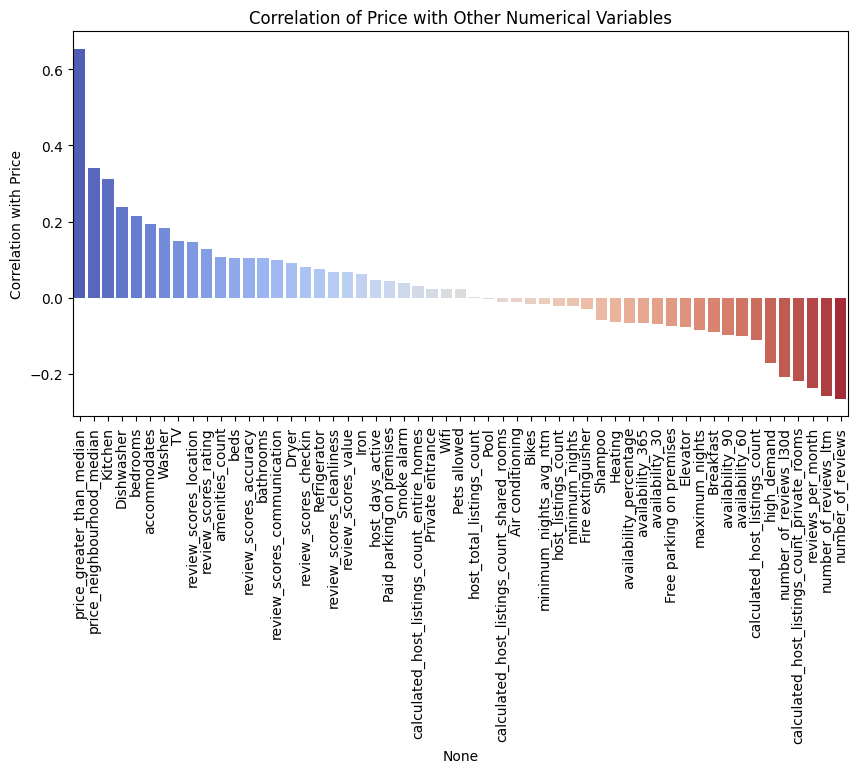

In [67]:
# Select only numeric columns
df_numeric = df_amsterdam.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Filter only the correlations with 'price'
price_corr = corr_matrix['price'].drop('price').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=price_corr.index, y=price_corr.values, palette="coolwarm")

# Customize the plot
plt.xticks(rotation=90)
plt.ylabel("Correlation with Price")
plt.title("Correlation of Price with Other Numerical Variables")
plt.show()

In [68]:
price_correlation = corr_matrix['price'].sort_values(ascending=False)
print(price_correlation)

price                                           1.000000
price_greater_than_median                       0.653315
price_neighbourhood_median                      0.341493
Kitchen                                         0.312607
Dishwasher                                      0.239104
bedrooms                                        0.213698
accommodates                                    0.192323
Washer                                          0.184025
TV                                              0.148391
review_scores_location                          0.145681
review_scores_rating                            0.129031
amenities_count                                 0.107933
beds                                            0.104984
review_scores_accuracy                          0.104878
bathrooms                                       0.104545
review_scores_communication                     0.098568
Dryer                                           0.090261
review_scores_checkin          

### Variable Multicollinearity Check

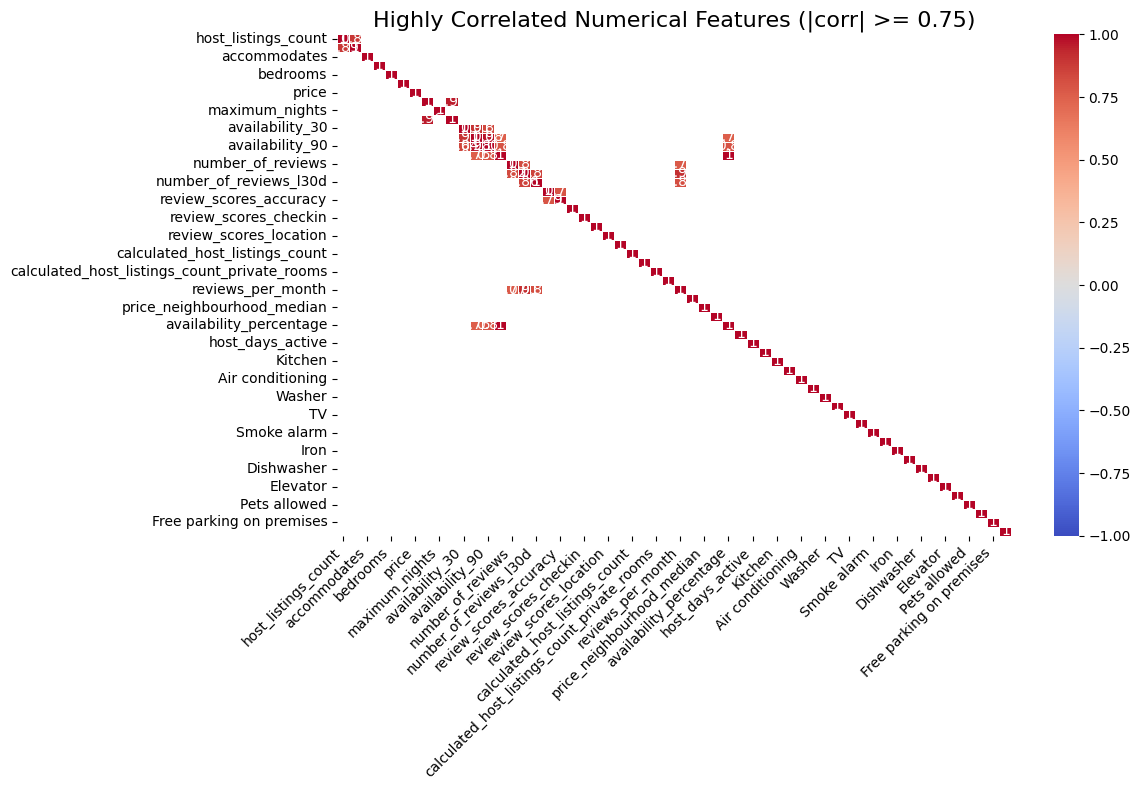

In [69]:
# Select only numerical columns
numeric_columns = df_amsterdam.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Filter for high correlations (positive and negative)
correlation_threshold = 0.75
high_corr_matrix = correlation_matrix[
    (correlation_matrix >= correlation_threshold) |
    (correlation_matrix <= -correlation_threshold)
]

# Visualize only the highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Highly Correlated Numerical Features (|corr| >= 0.75)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
# Select only numerical columns
numeric_columns = df_amsterdam.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr().abs()  # Use absolute values for easier filtering

# Set the correlation threshold
correlation_threshold = 0.75

# Extract highly correlated variable pairs (without duplicates)
high_corr_pairs = (
    correlation_matrix
    .unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Filter for high correlations, excluding self-correlations (corr = 1)
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs < 1) & (high_corr_pairs >= correlation_threshold)
]

# Display the pairs of variables with high correlation
print("Highly correlated numerical features (|corr| >= 0.75):")
print(high_corr_pairs)


Highly correlated numerical features (|corr| >= 0.75):
availability_percentage    availability_365           1.000000
availability_90            availability_60            0.975708
minimum_nights_avg_ntm     minimum_nights             0.960493
number_of_reviews_ltm      reviews_per_month          0.908509
availability_60            availability_30            0.905183
host_total_listings_count  host_listings_count        0.887091
number_of_reviews_l30d     number_of_reviews_ltm      0.857620
availability_90            availability_30            0.842960
number_of_reviews          number_of_reviews_ltm      0.823943
number_of_reviews_l30d     reviews_per_month          0.817654
availability_90            availability_percentage    0.797761
availability_365           availability_90            0.797761
review_scores_accuracy     review_scores_rating       0.789346
reviews_per_month          number_of_reviews          0.771440
availability_percentage    availability_60            0.754434


#### We decided to set a threshold of 0.75, dropping all variables that exceed the correlation limit:

In [71]:
# Drop only the newly specified columns
columns_to_drop = [
    'availability_percentage', 'availability_60', 'availability_90', 'minimum_nights_avg_ntm',
    'number_of_reviews_ltm', 'availability_30', 'host_total_listings_count', 'number_of_reviews_l30d',
    'review_scores_accuracy', 'reviews_per_month']

# Drop the columns from the dataframe
df_amsterdam.drop(columns=columns_to_drop, inplace=True)

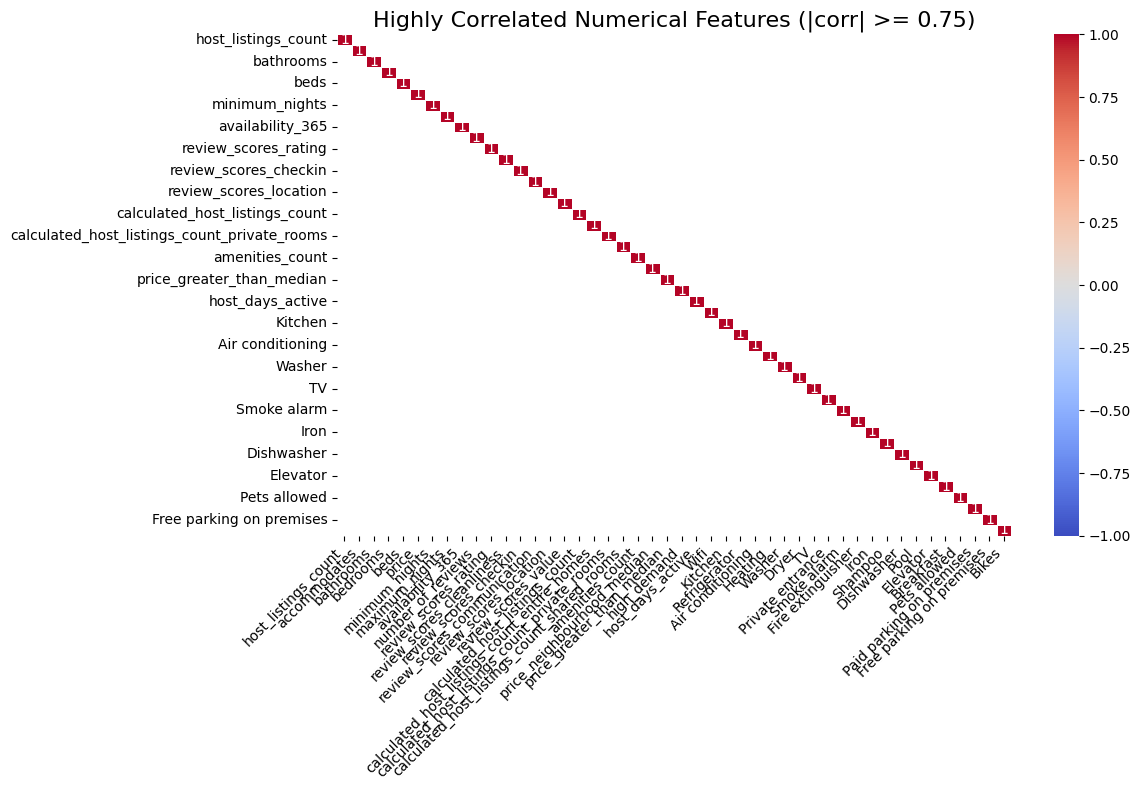

In [72]:
# Select only numerical columns
numeric_columns = df_amsterdam.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Filter for high correlations (positive and negative)
correlation_threshold = 0.75
high_corr_matrix = correlation_matrix[
    (correlation_matrix >= correlation_threshold) |
    (correlation_matrix <= -correlation_threshold)
]

# Visualize only the highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Highly Correlated Numerical Features (|corr| >= 0.75)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [73]:
df_amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   host_response_time                            10032 non-null  object  
 1   host_response_rate                            10032 non-null  object  
 2   host_acceptance_rate                          10032 non-null  object  
 3   host_is_superhost                             10032 non-null  object  
 4   host_listings_count                           10032 non-null  int64   
 5   host_identity_verified                        10032 non-null  object  
 6   neighbourhood_cleansed                        10032 non-null  object  
 7   room_type                                     10032 non-null  object  
 8   accommodates                                  10032 non-null  int64   
 9   bathrooms                                     1003